<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Forest_cover dataset

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Splitting X and y into training and test datasets](#section4)<br>  
 
5. [Model evaluation](#section5)<br>
    - 5.1 [KNN](#section501)<br>
    - 5.2 [Random Forest Classifier](#section502)<br>
    - 5.3 [Extra Tree Classifier](#section503)<br>
    - 5.4 [PCA](#section504)<br>
6.[Conclusion](#section6)<br>
    

<a id=section1></a>
## 1. Problem Statement

<img src="https://i.pinimg.com/originals/4a/22/04/4a2204ad07714695f6f523d7840afbe9.jpg" align='left'><br/>

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir

2 - Lodgepole Pine

3 - Ponderosa Pine

4 - Cottonwood/Willow

5 - Aspen

6 - Douglas-fir

7 - Krummholz




#The  set (15120 observations) contains both features and the Cover_Type. 

<a id=section2></a>
## 2. Data Loading and Description

Data Fields
Elevation - Elevation in meters

Aspect - Aspect in degrees azimuth

Slope - Slope in degrees

Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features

Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features

Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway

Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice

Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice

Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice

Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition 
points
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type 
designation

Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1 - Rawah Wilderness Area

2 - Neota Wilderness Area

3 - Comanche Peak Wilderness Area

4 - Cache la Poudre Wilderness Area

The soil types are:

1 Cathedral family - Rock outcrop complex, extremely stony.

2 Vanet - Ratake families complex, very stony.

3 Haploborolis - Rock outcrop complex, rubbly.

4 Ratake family - Rock outcrop complex, rubbly.

5 Vanet family - Rock outcrop complex complex, rubbly.

6 Vanet - Wetmore families - Rock outcrop complex, stony.

7 Gothic family.

8 Supervisor - Limber families complex.

9 Troutville family, very stony.

10 Bullwark - Catamount families - Rock outcrop complex, rubbly.

11 Bullwark - Catamount families - Rock land complex, rubbly.

12 Legault family - Rock land complex, stony.

13 Catamount family - Rock land - Bullwark family complex, rubbly.

14 Pachic Argiborolis - Aquolis complex.

15 unspecified in the USFS Soil and ELU Survey.

16 Cryaquolis - Cryoborolis complex.

17 Gateview family - Cryaquolis complex.

18 Rogert family, very stony.

19 Typic Cryaquolis - Borohemists complex.

20 Typic Cryaquepts - Typic Cryaquolls complex.

21 Typic Cryaquolls - Leighcan family, till substratum complex.

22 Leighcan family, till substratum, extremely bouldery.

23 Leighcan family, till substratum - Typic Cryaquolls complex.

24 Leighcan family, extremely stony.

25 Leighcan family, warm, extremely stony.

26 Granile - Catamount families complex, very stony.

27 Leighcan family, warm - Rock outcrop complex, extremely stony.

28 Leighcan family - Rock outcrop complex, extremely stony.

29 Como - Legault families complex, extremely stony.

30 Como family - Rock land - Legault family complex, extremely stony.

31 Leighcan - Catamount families complex, extremely stony.

32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.

33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.

34 Cryorthents - Rock land complex, extremely stony.

35 Cryumbrepts - Rock outcrop - Cryaquepts complex.

36 Bross family - Rock land - Cryumbrepts complex, extremely stony.

37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.

38 Leighcan - Moran families - Cryaquolls complex, extremely stony.

39 Moran family - Cryorthents - Leighcan family complex, extremely stony.

40 Moran family - Cryorthents - Rock land complex, extremely stony.



#Importing Packages

In [1]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import warnings
#import cudf, cuml
warnings.filterwarnings('ignore')

#Importing the Dataset

In [2]:
Forest_cover = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Forestcover_train.csv')
Forest_cover.sample(5)

Id  Elevation  Aspect  ...  Soil_Type39  Soil_Type40  Cover_Type
9473    9474       3281      34  ...            1            0           7
3887    3888       2829      98  ...            0            0           5
8279    8280       3442     227  ...            0            0           7
2113    2114       2807      12  ...            0            0           2
10419  10420       3003     315  ...            0            0           1

[5 rows x 56 columns]

 <a id=section3></a>
 ## 3.Exploratory Data Analysis

In [3]:
Forest_cover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [4]:
Forest_cover.Cover_Type.value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

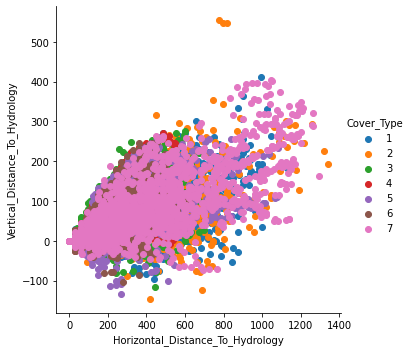

In [ ]:
sns.FacetGrid(Forest_cover, hue="Cover_Type", size=5) \
   .map(plt.scatter, "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology") \
   .add_legend()

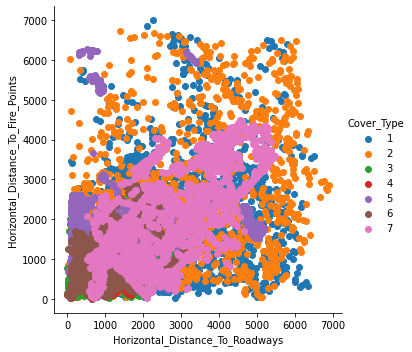

In [ ]:
sns.FacetGrid(Forest_cover, hue="Cover_Type", size=5) \
   .map(plt.scatter, "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points") \
   .add_legend()

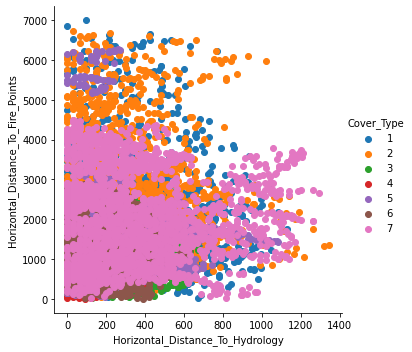

In [ ]:
sns.FacetGrid(Forest_cover, hue="Cover_Type", size=5) \
   .map(plt.scatter, "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points") \
   .add_legend()

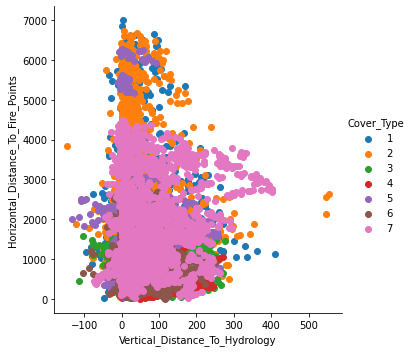

In [ ]:
sns.FacetGrid(Forest_cover, hue="Cover_Type", size=5) \
   .map(plt.scatter, "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points") \
   .add_legend()

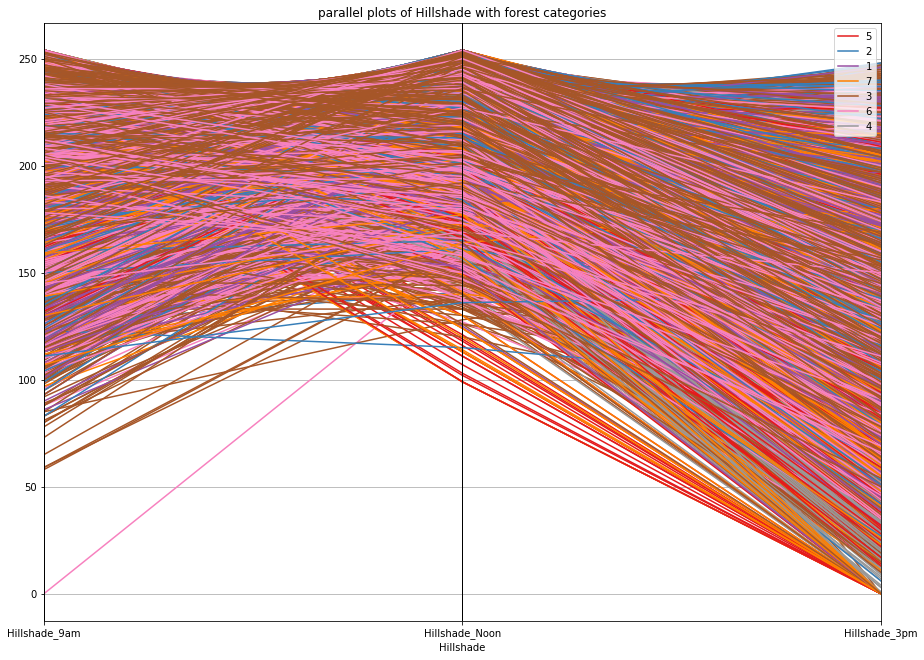

In [ ]:
from pandas.plotting import parallel_coordinates
temp = Forest_cover[['Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Cover_Type']]
plt.figure(figsize=(15,11))
parallel_coordinates(temp,'Cover_Type', colormap=plt.get_cmap("Set1"))
plt.title("parallel plots of Hillshade with forest categories")
plt.xlabel("Hillshade")
plt.show()

In [ ]:
Forest_cover['Cover_Type'].describe()

count    15120.000000
mean         4.000000
std          2.000066
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Cover_Type, dtype: float64

In [ ]:
Forest_cover.describe()

Id     Elevation  ...   Soil_Type40    Cover_Type
count  15120.00000  15120.000000  ...  15120.000000  15120.000000
mean    7560.50000   2749.322553  ...      0.030357      4.000000
std     4364.91237    417.678187  ...      0.171574      2.000066
min        1.00000   1863.000000  ...      0.000000      1.000000
25%     3780.75000   2376.000000  ...      0.000000      2.000000
50%     7560.50000   2752.000000  ...      0.000000      4.000000
75%    11340.25000   3104.000000  ...      0.000000      6.000000
max    15120.00000   3849.000000  ...      1.000000      7.000000

[8 rows x 56 columns]

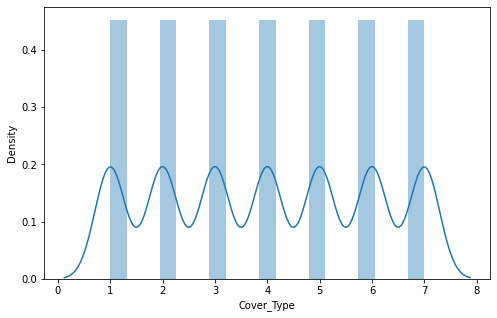

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(Forest_cover['Cover_Type'])

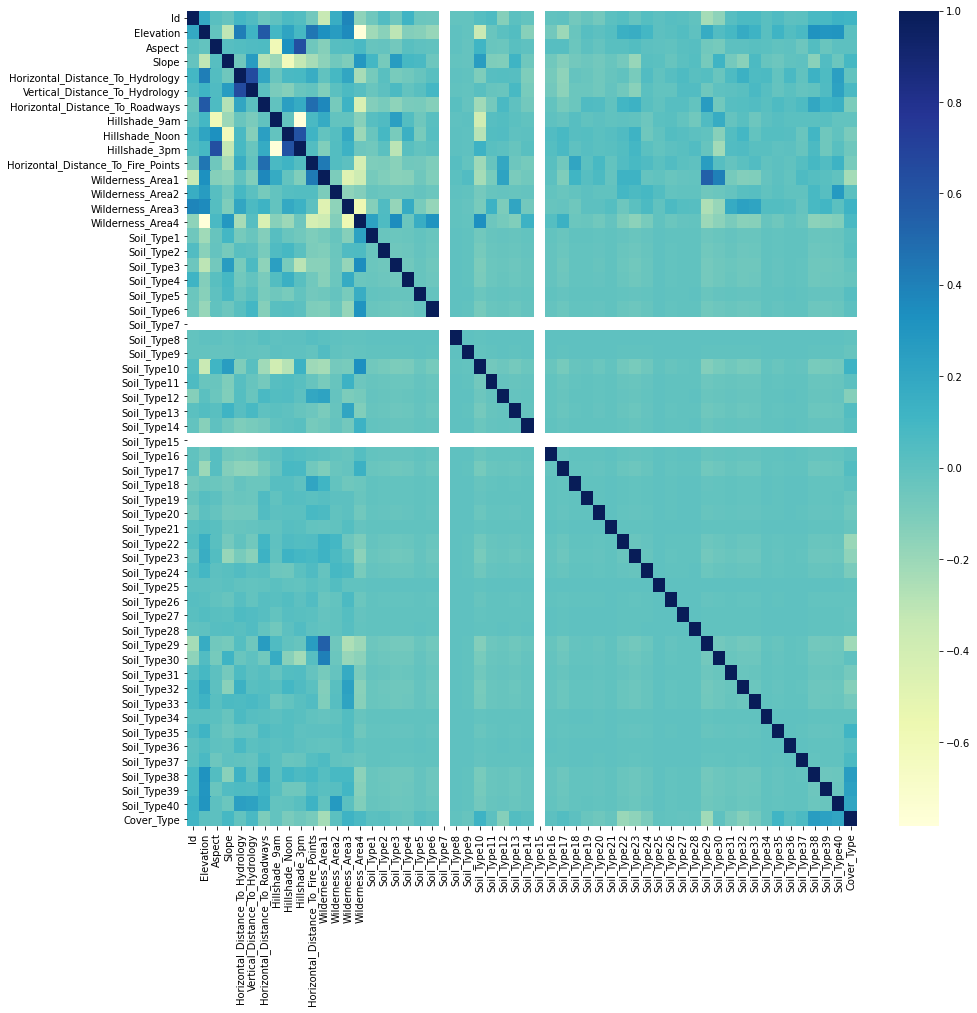

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(Forest_cover.corr(),fmt=".2f",cmap="YlGnBu")

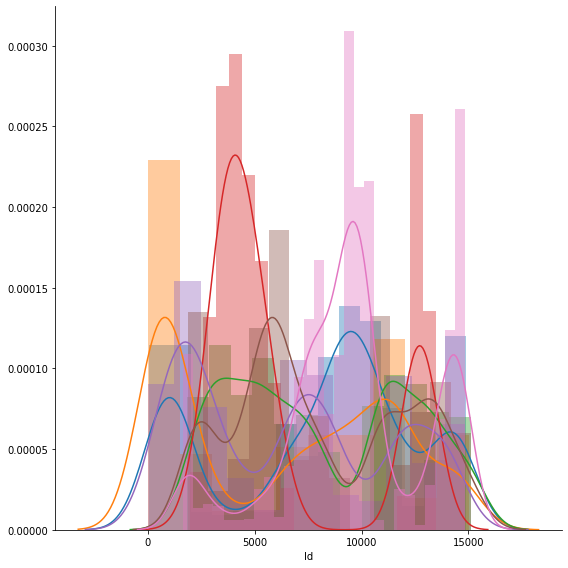

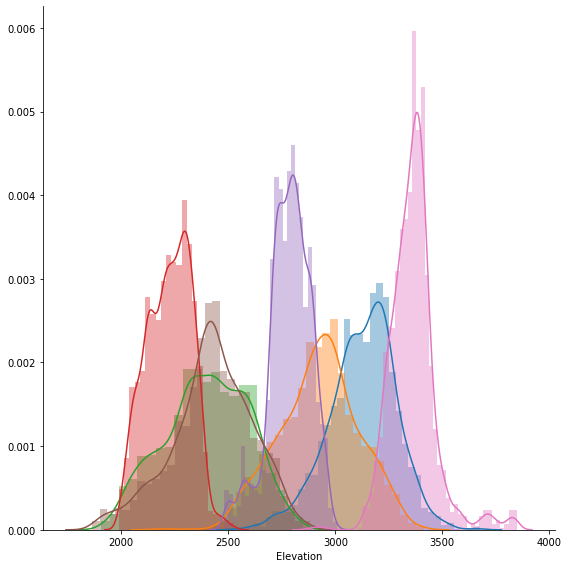

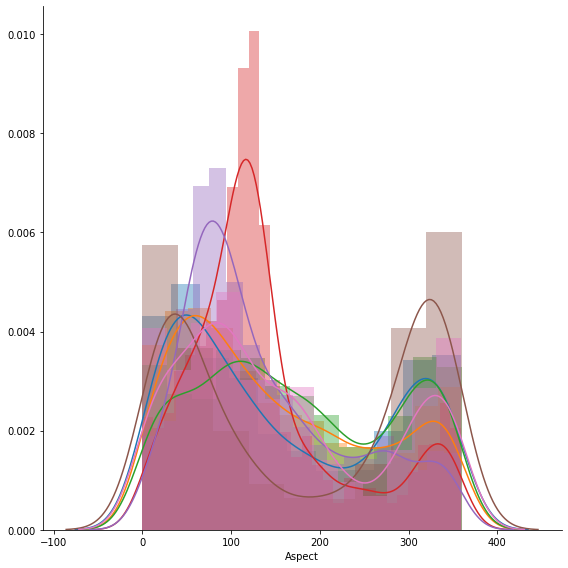

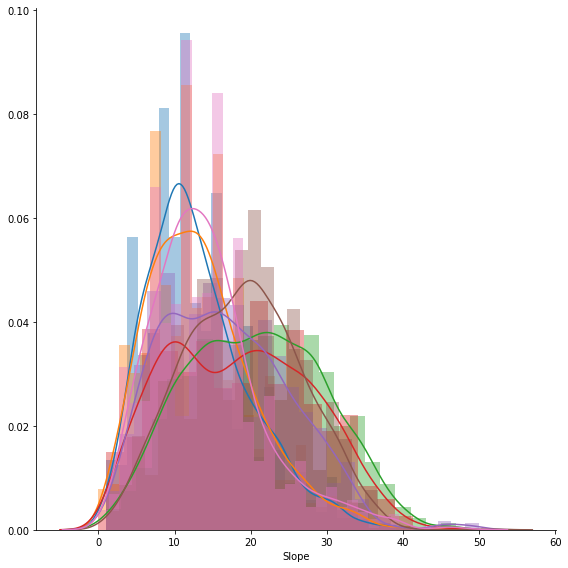

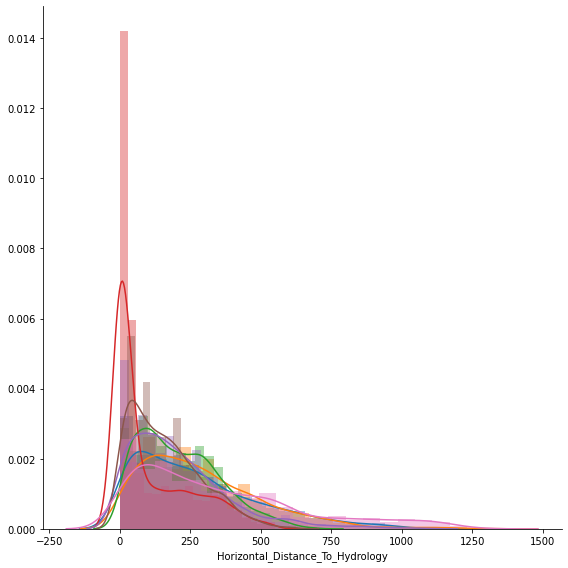

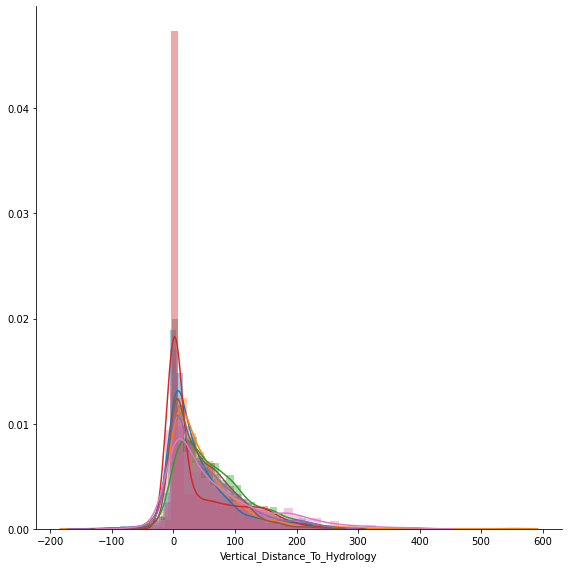

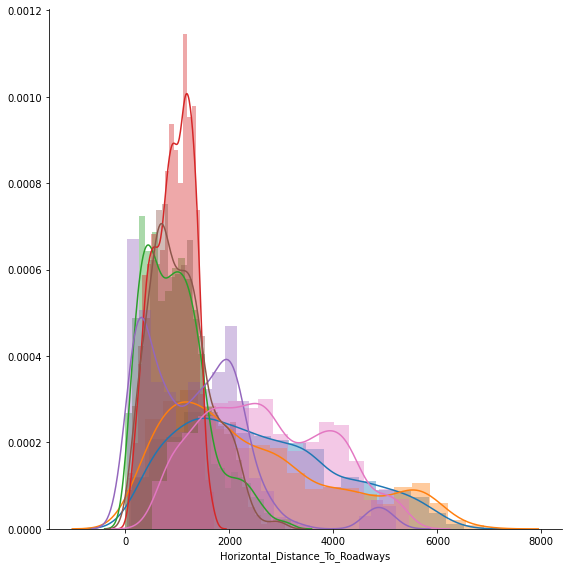

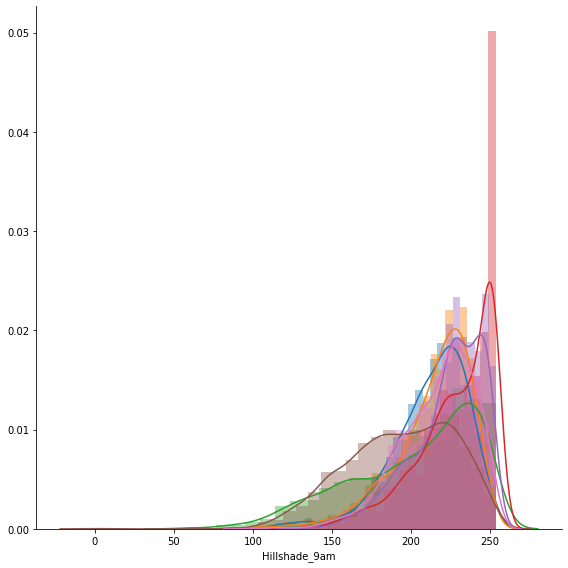

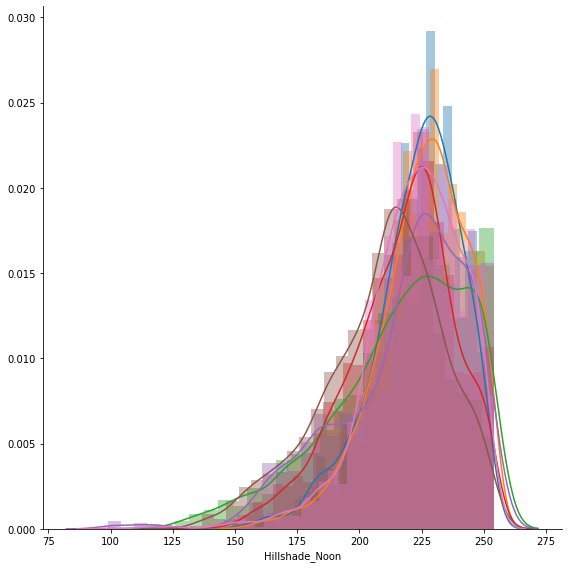

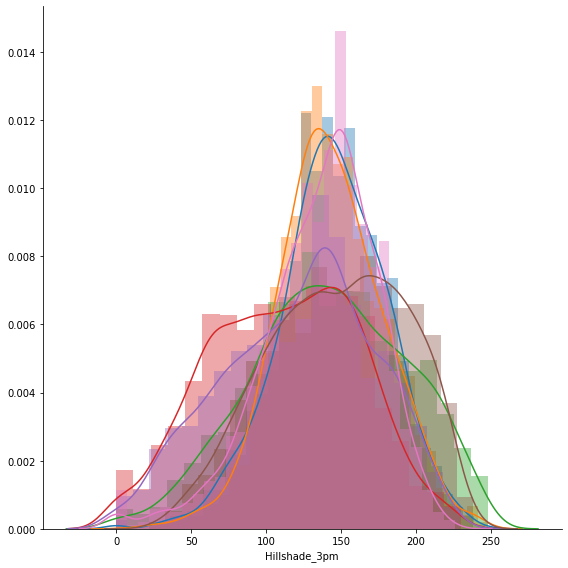

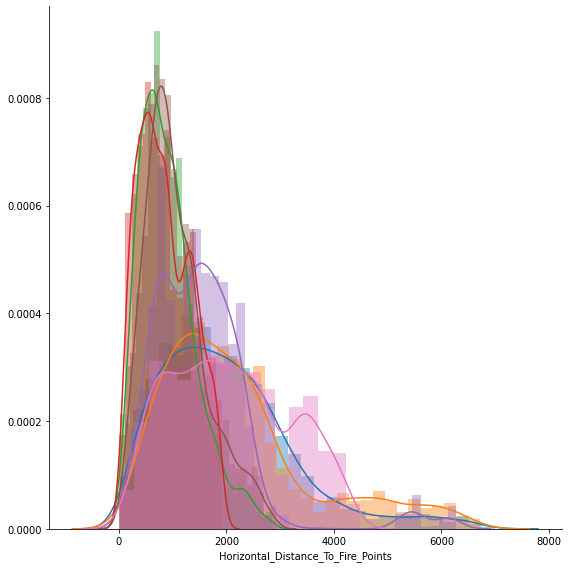

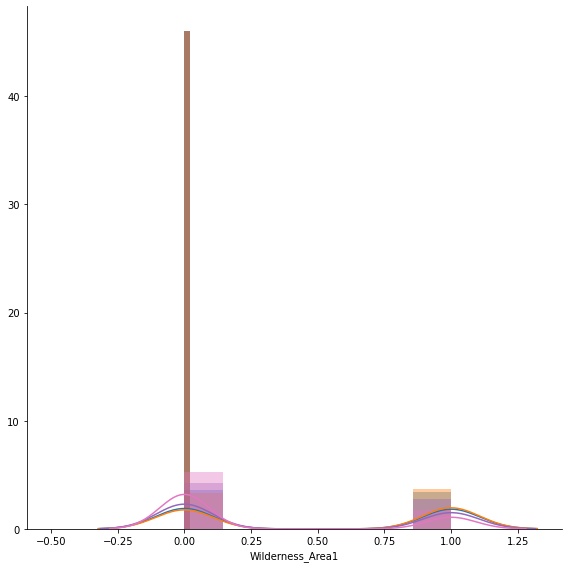

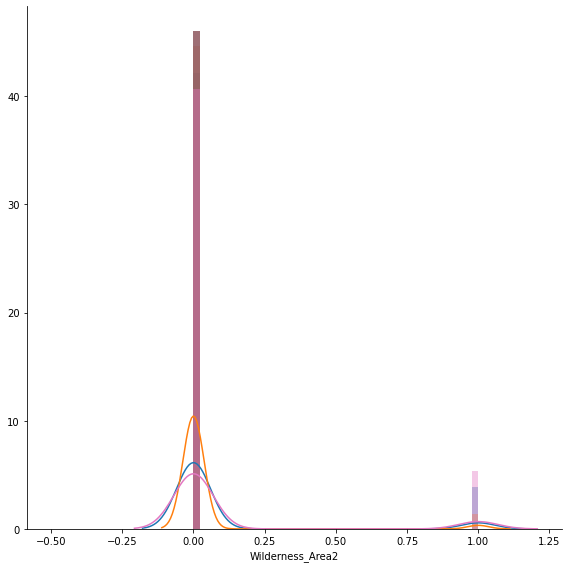

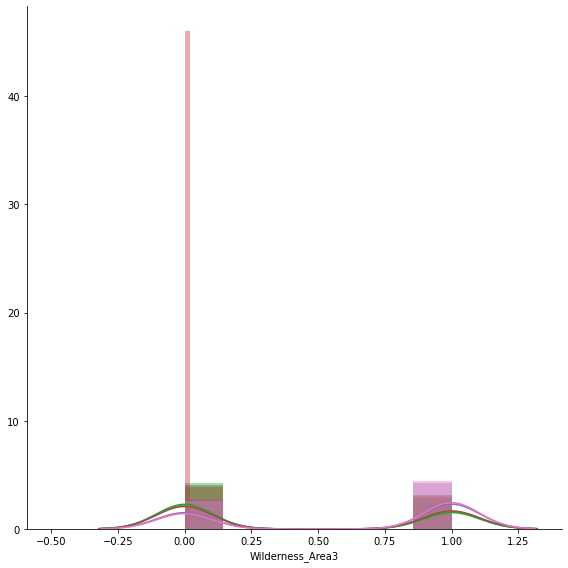

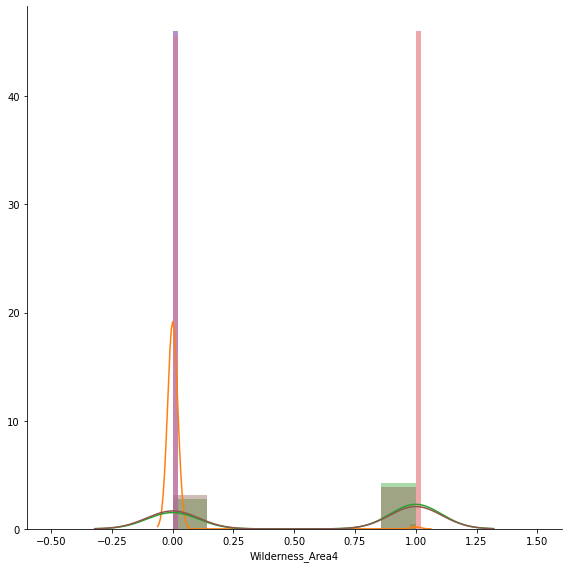

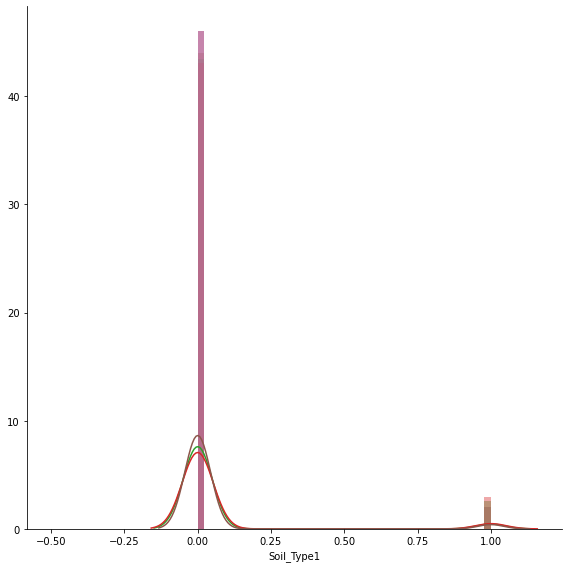

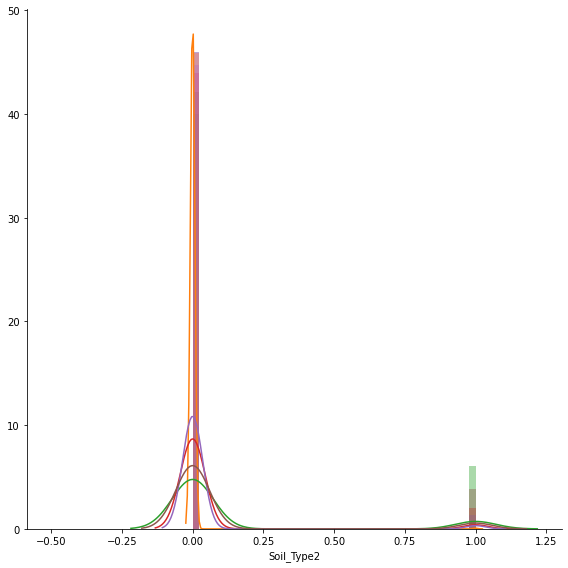

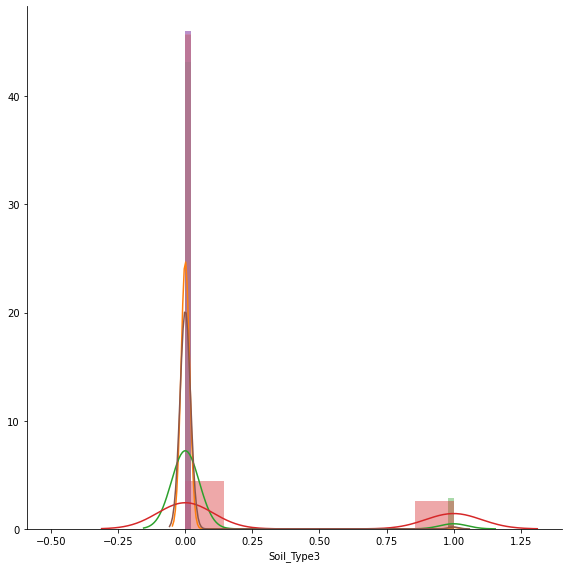

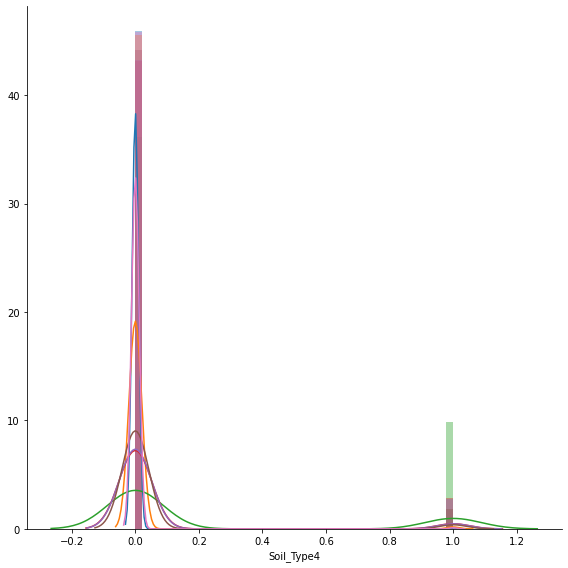

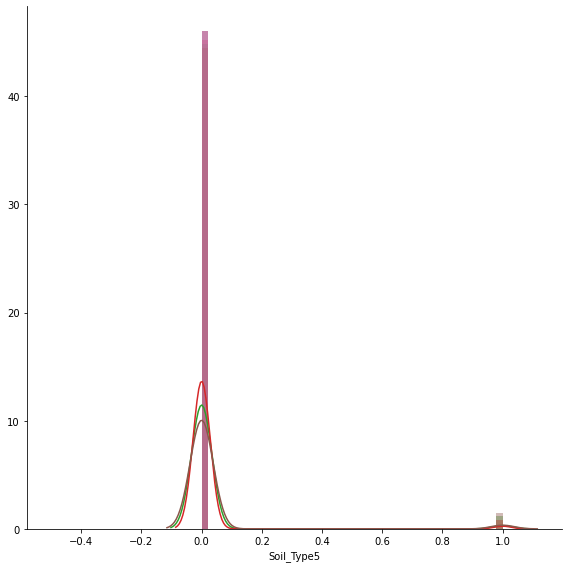

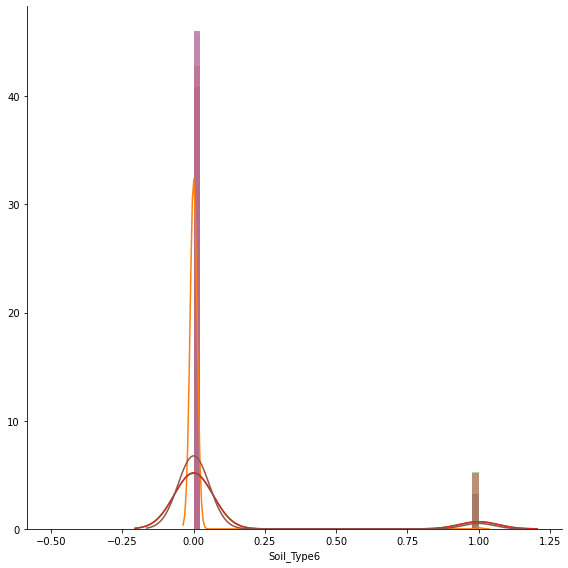

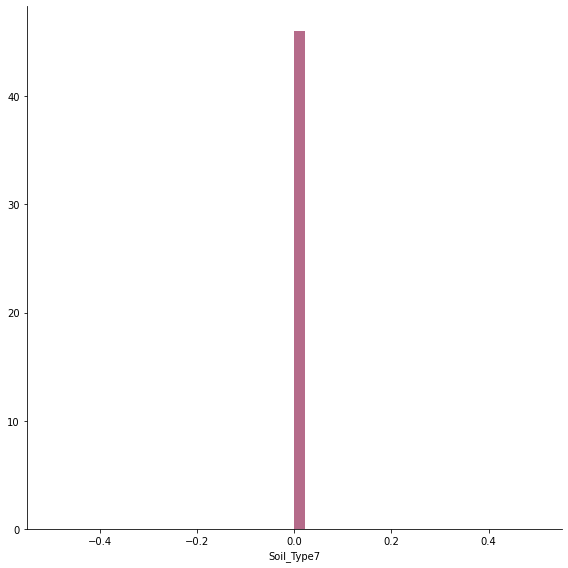

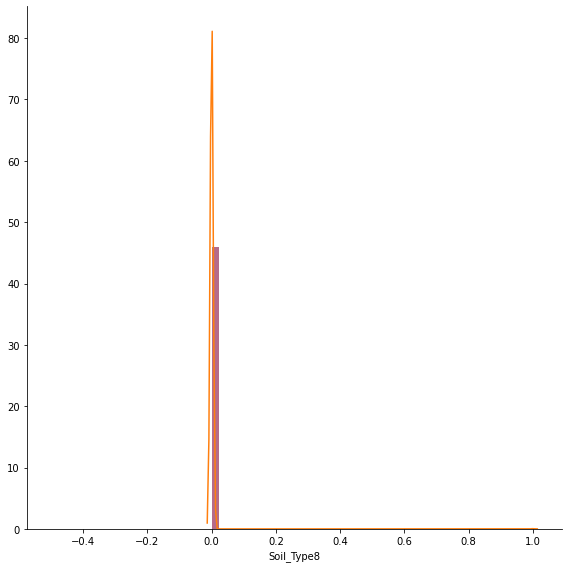

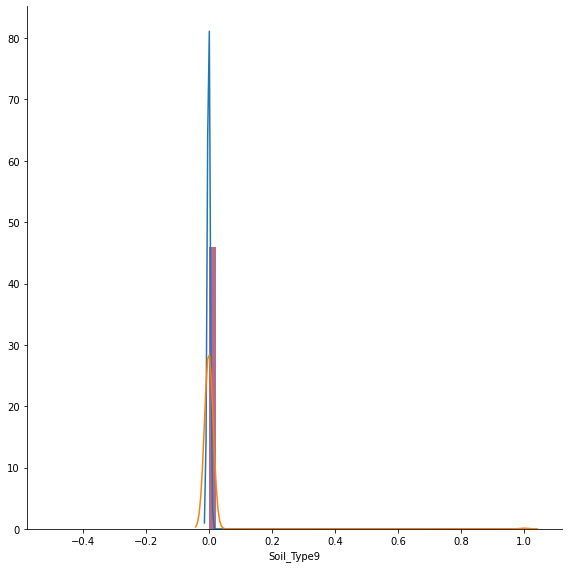

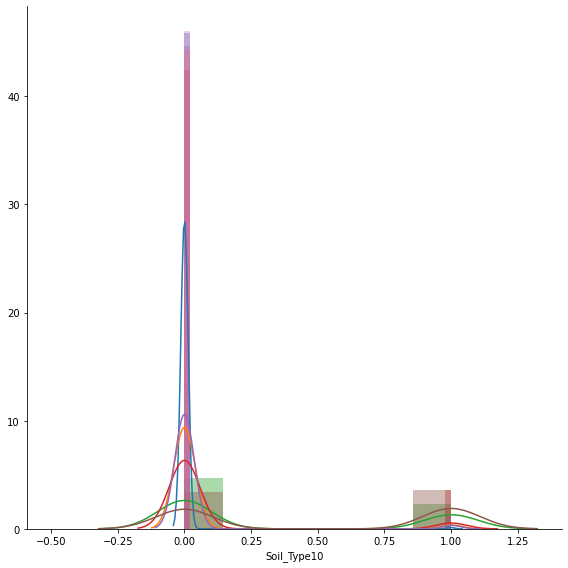

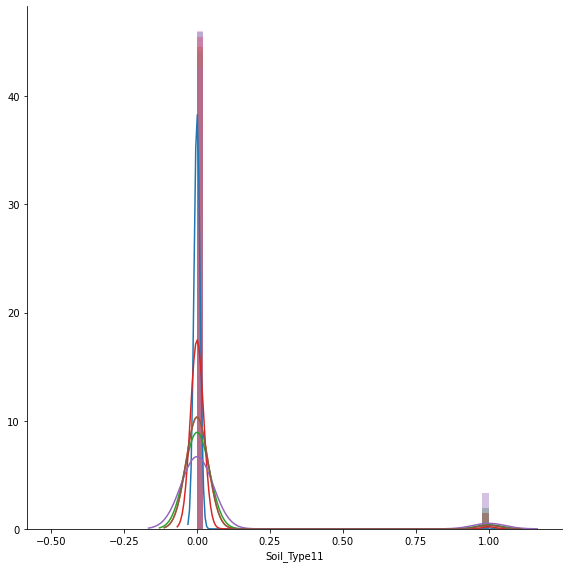

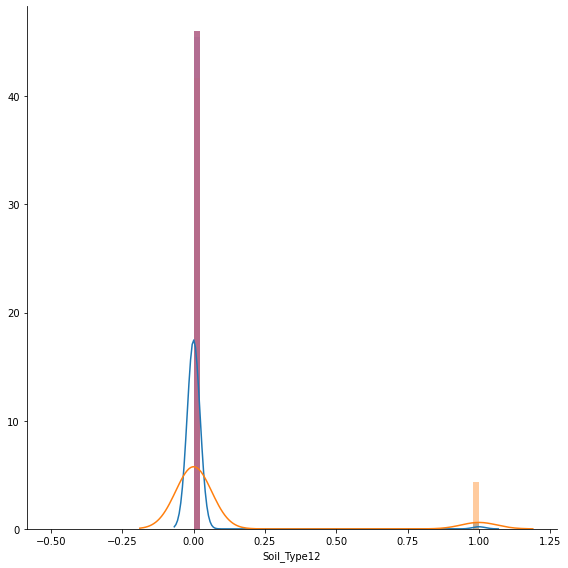

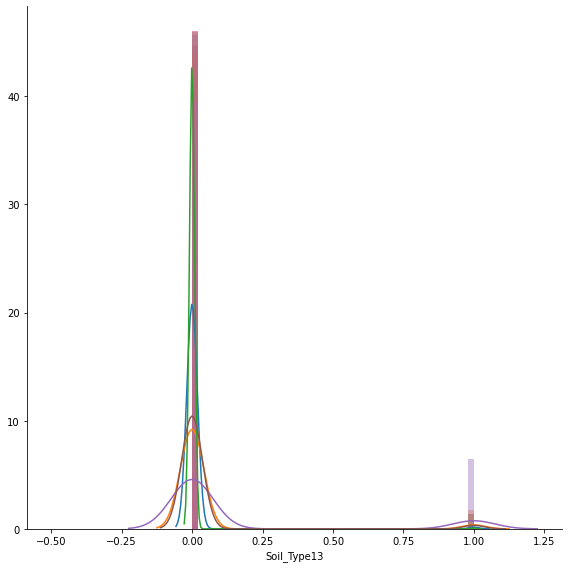

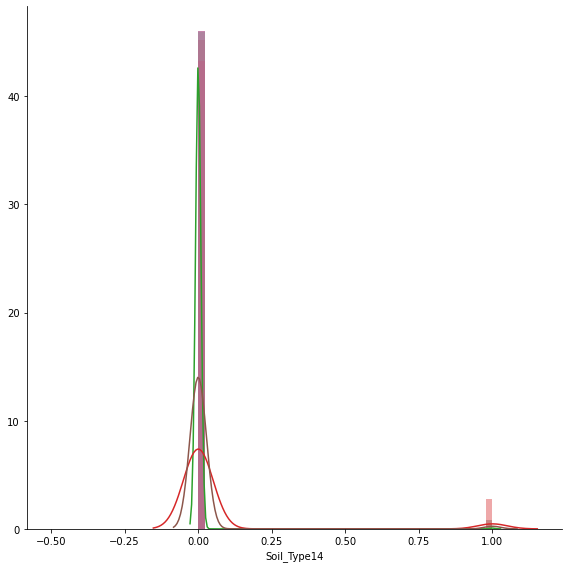

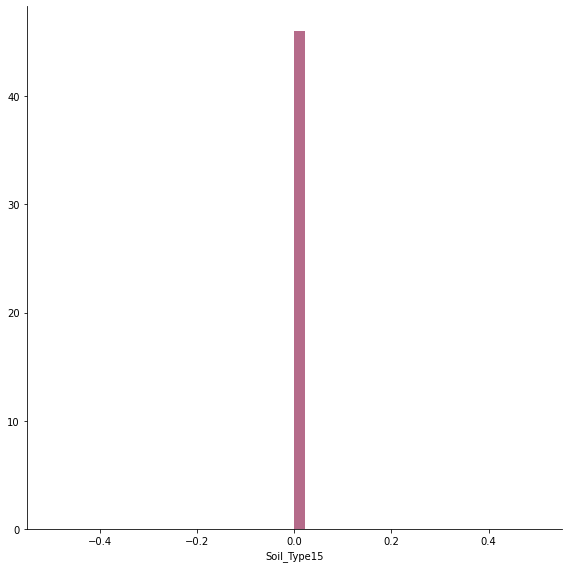

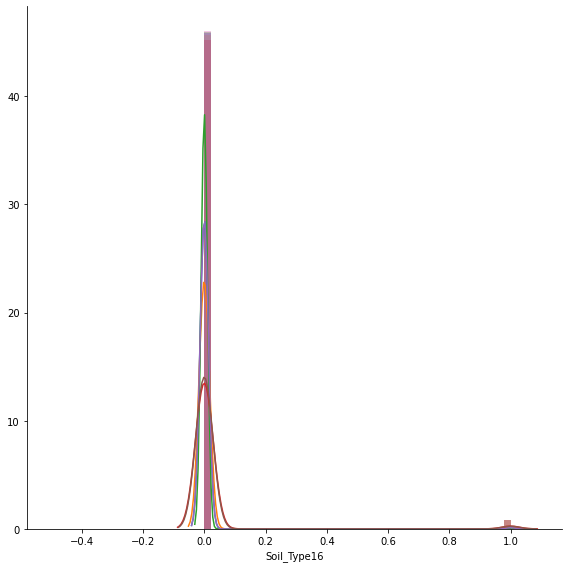

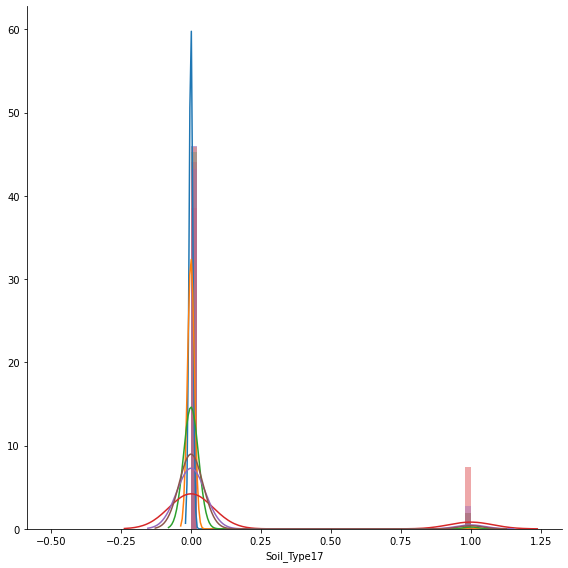

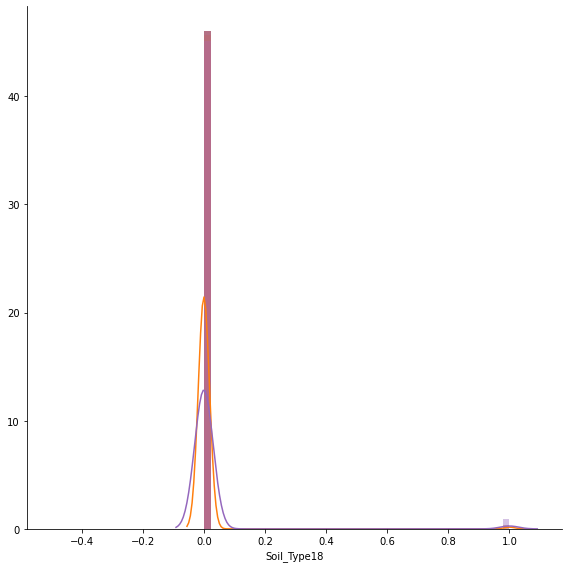

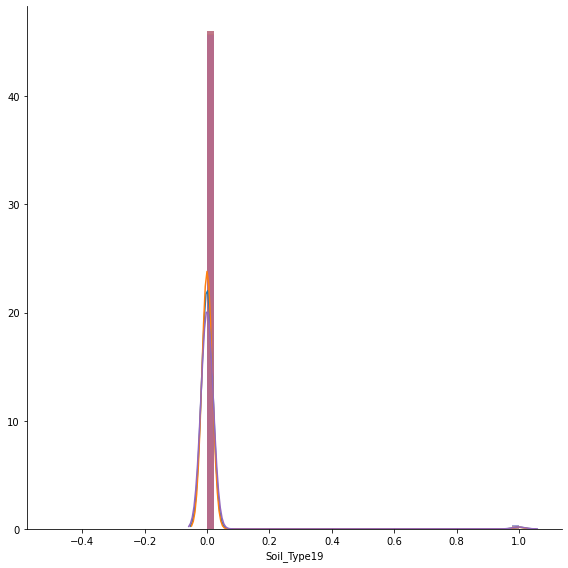

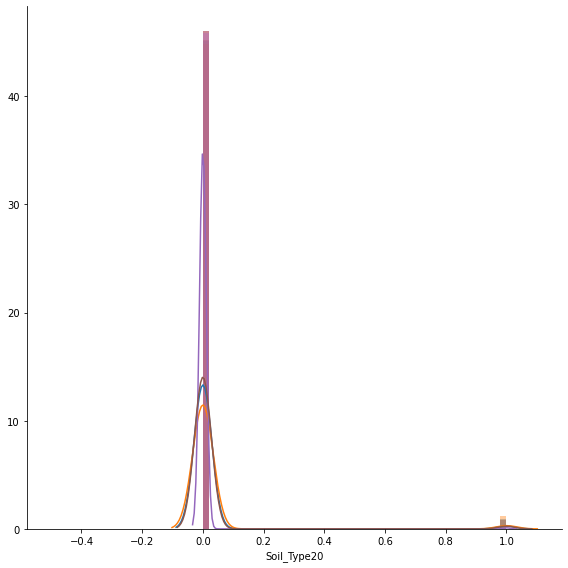

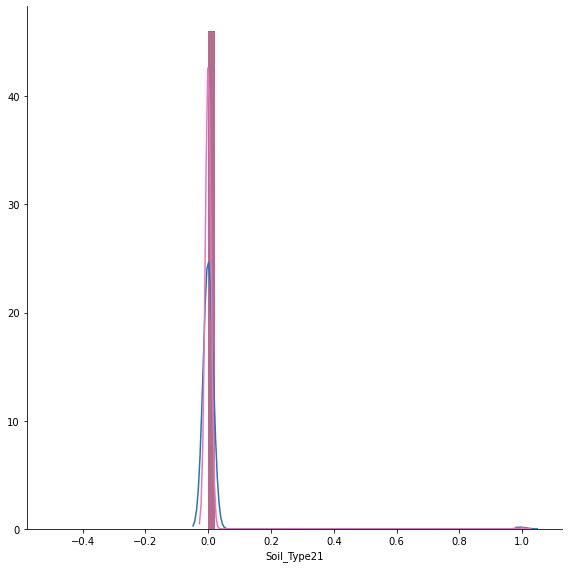

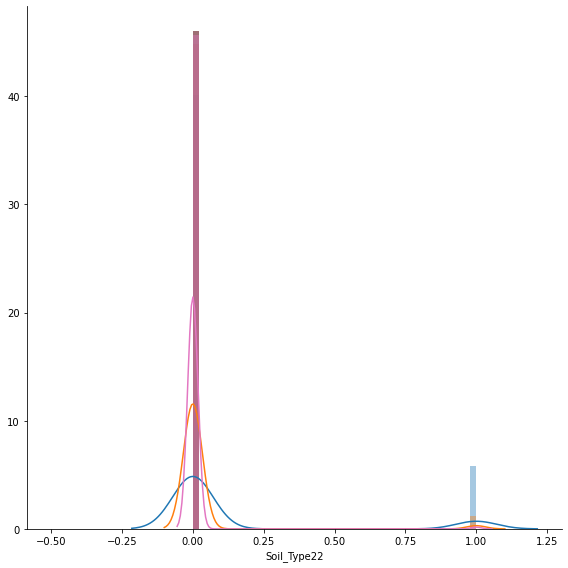

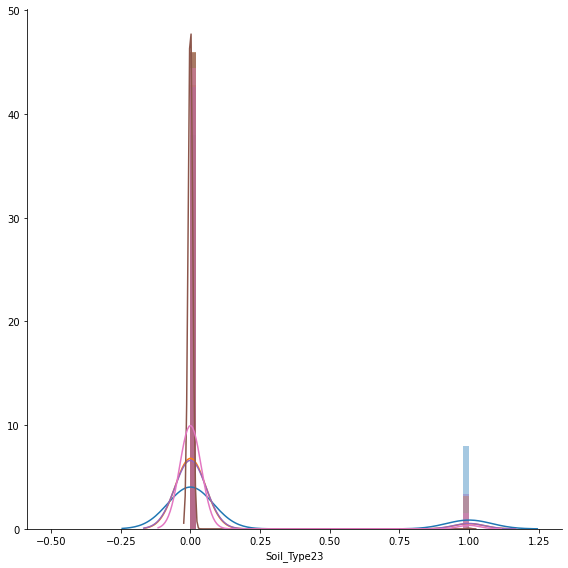

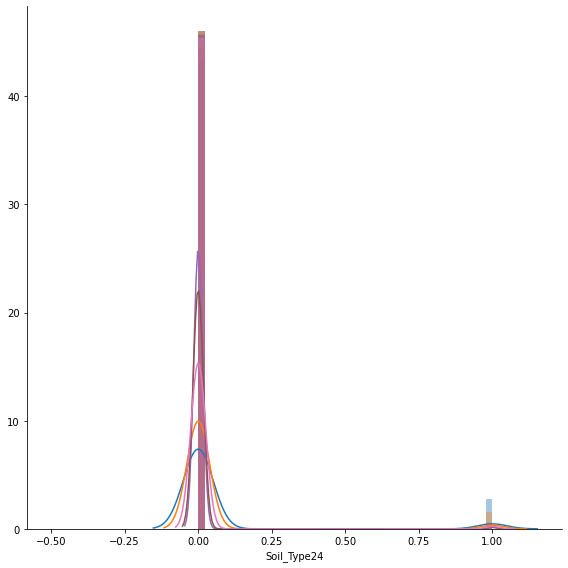

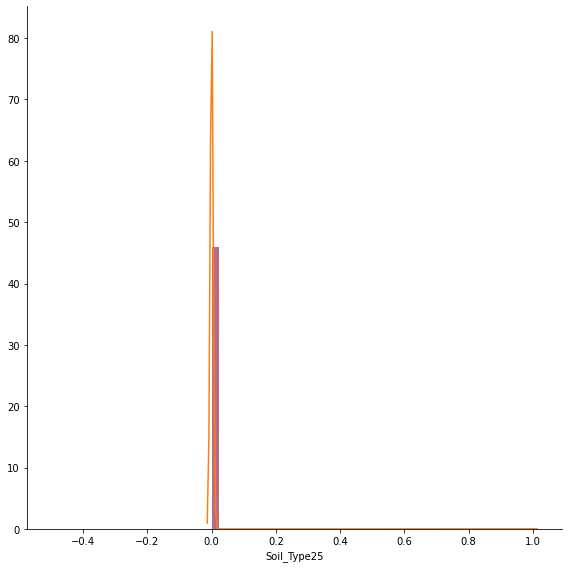

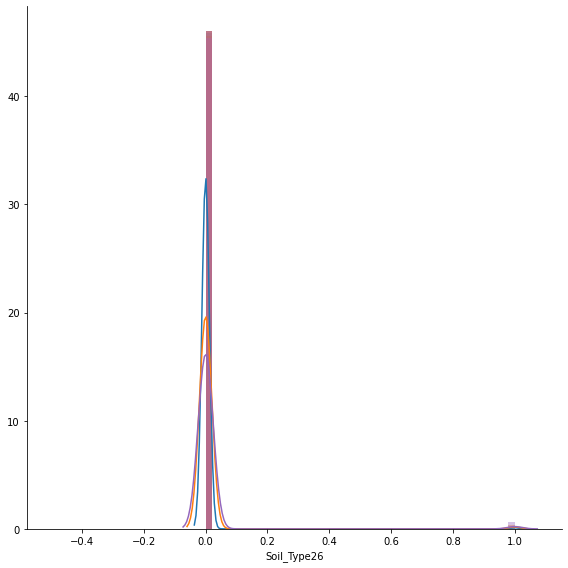

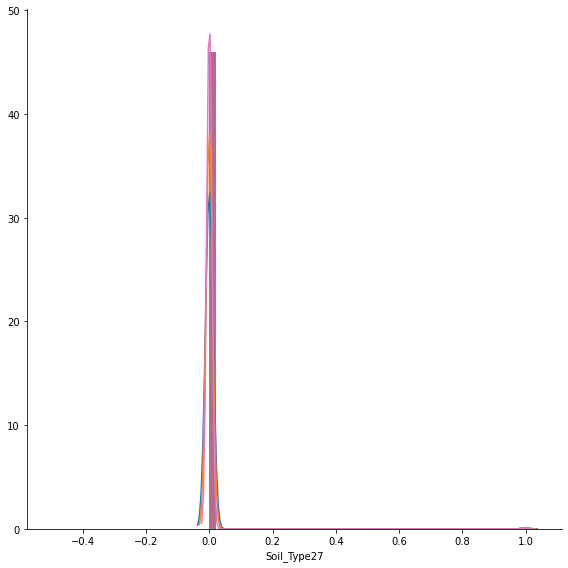

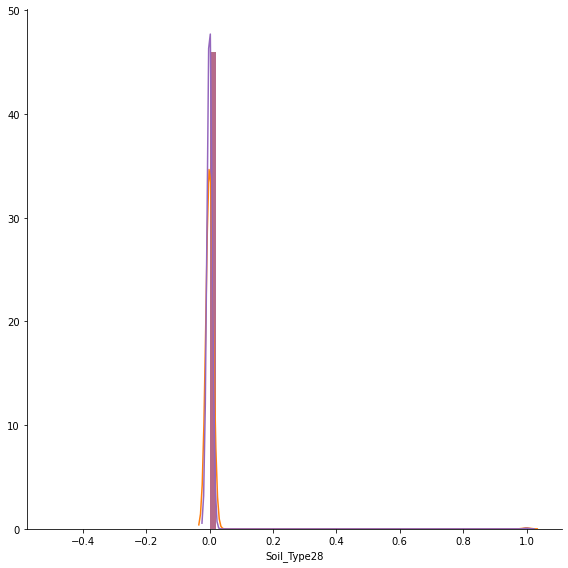

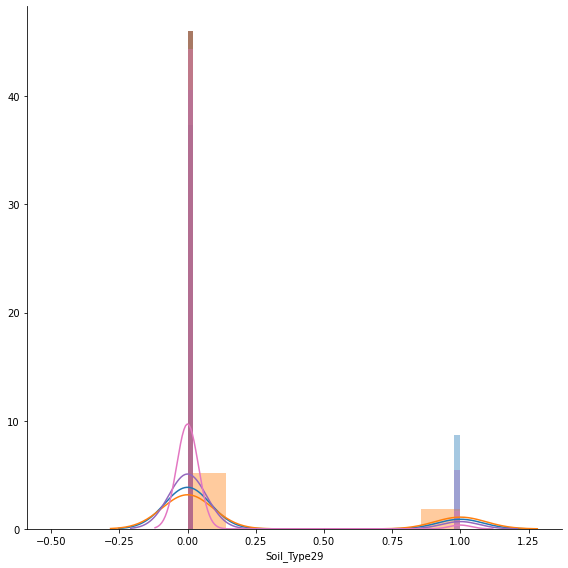

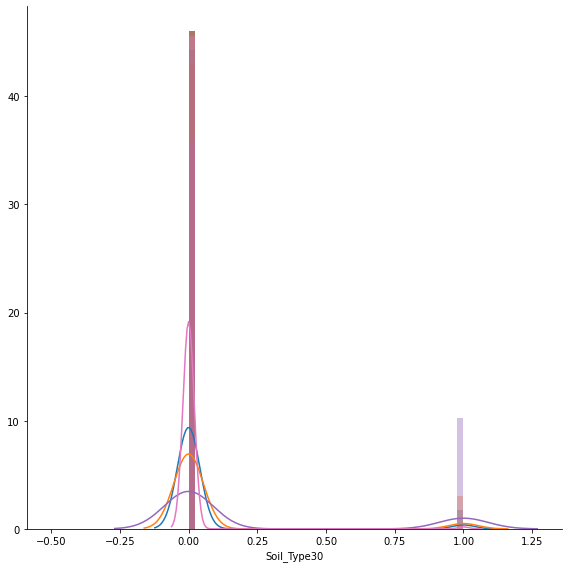

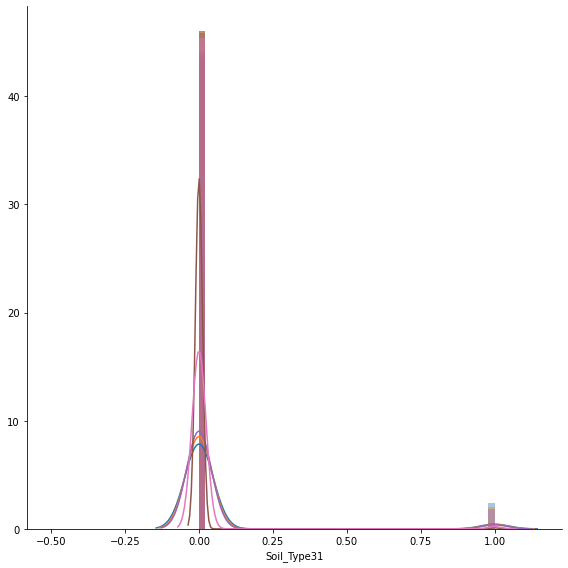

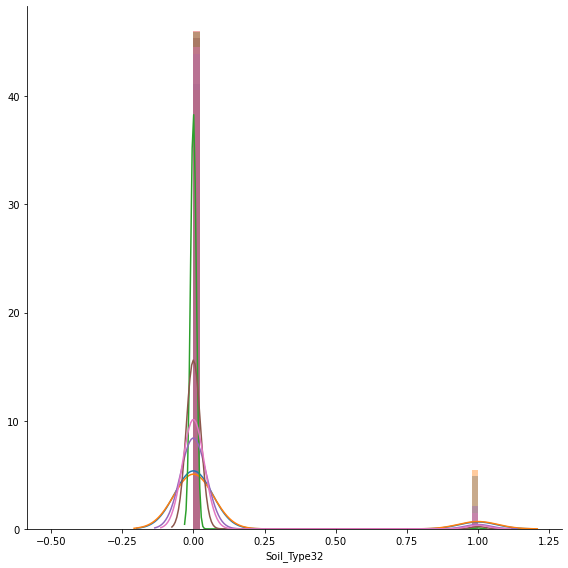

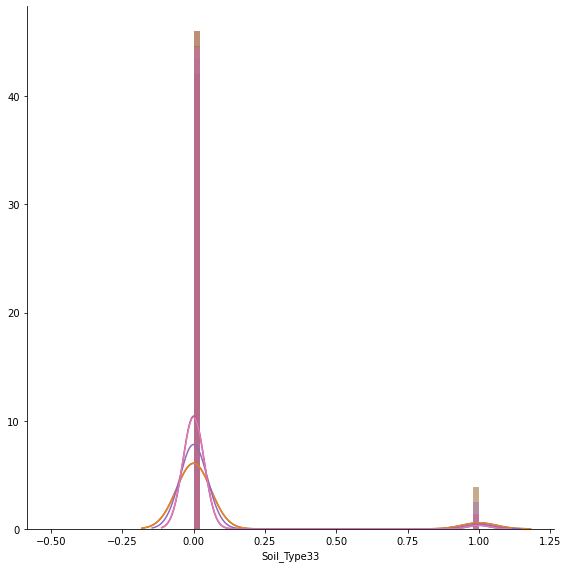

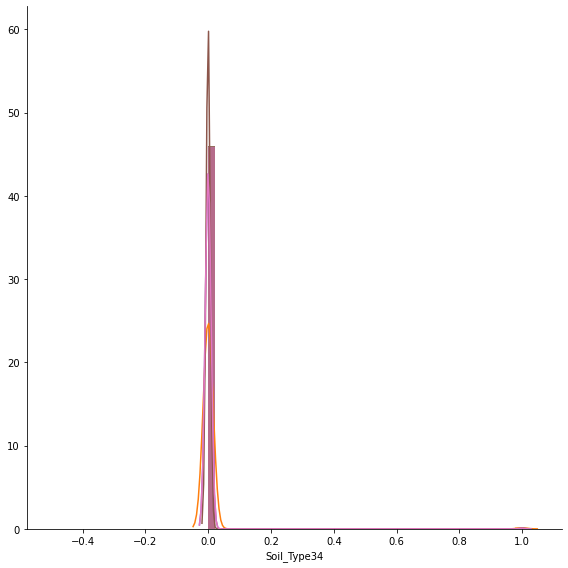

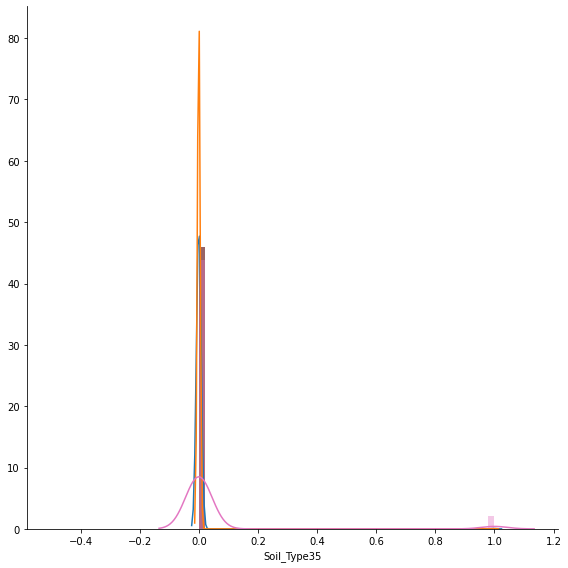

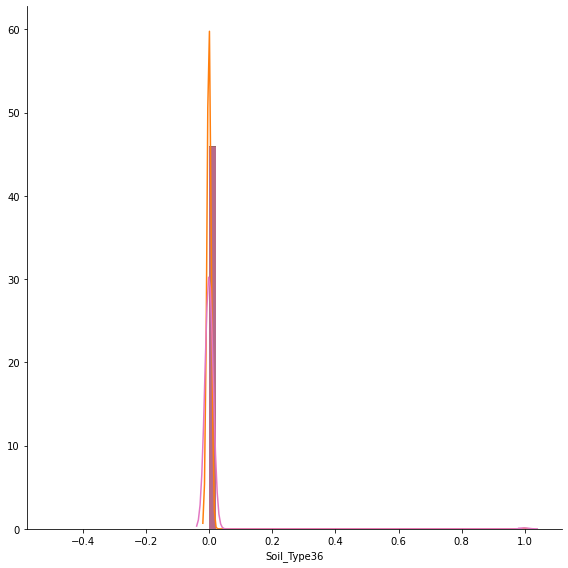

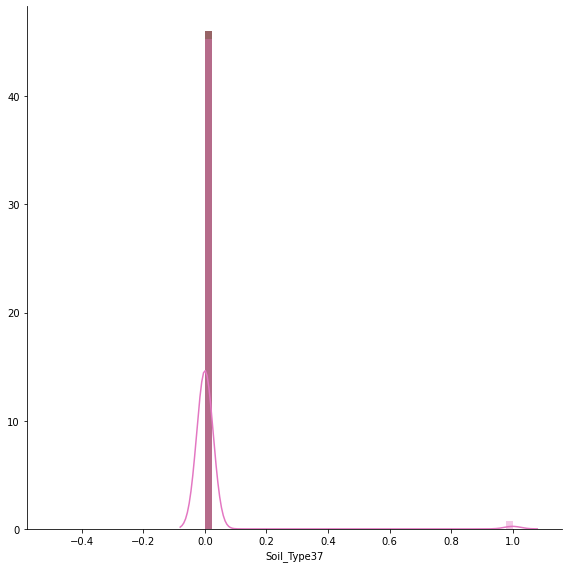

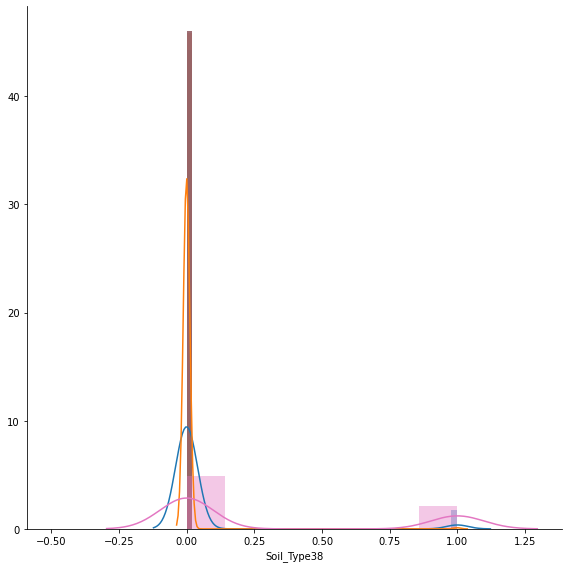

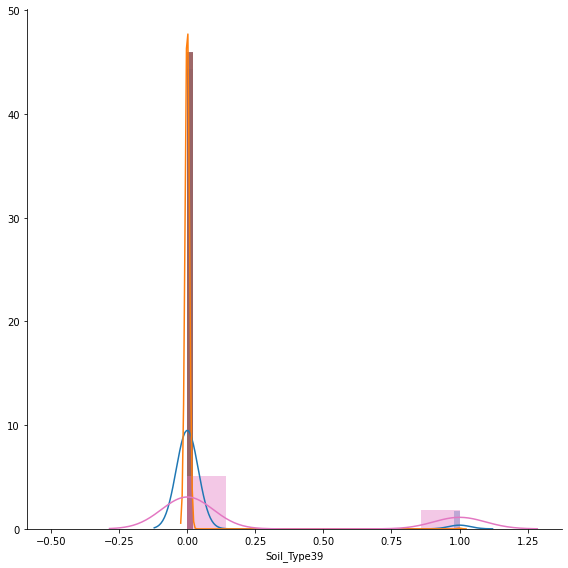

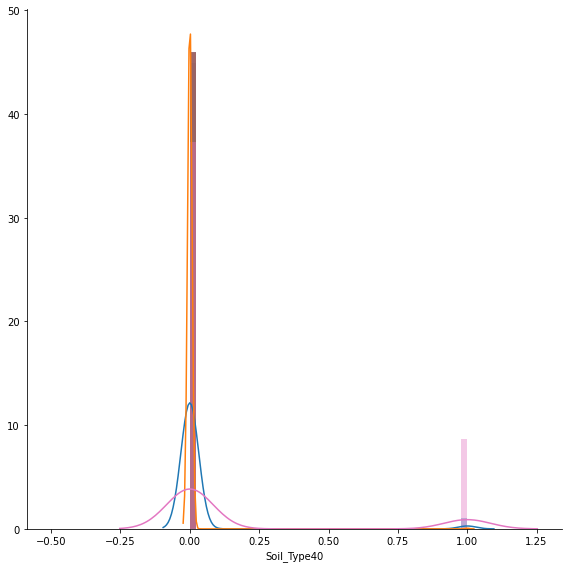

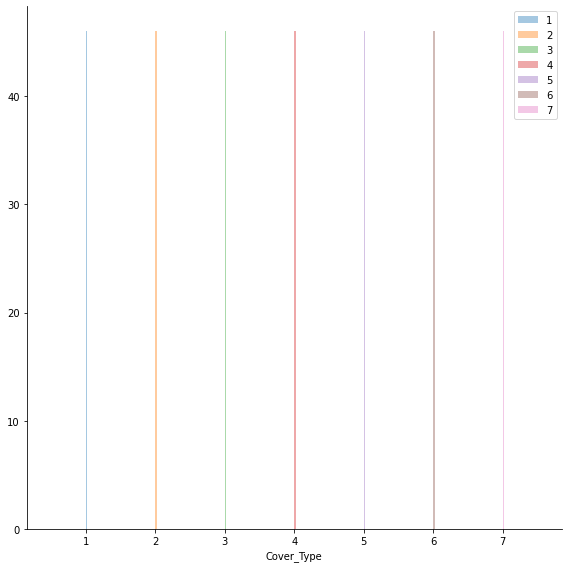

In [ ]:
for i in Forest_cover.columns:
    sns.FacetGrid(Forest_cover,hue="Cover_Type",size=8)\
        .map(sns.distplot ,i)
plt.legend()  

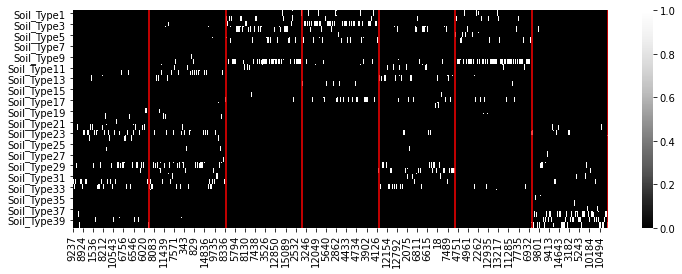

In [ ]:
# This shows the expression of Soil_Type for the objective variable.
plt.figure(figsize=(12, 4))
sns.heatmap(Forest_cover.iloc[:, -41:].sort_values(by="Cover_Type").iloc[:, :-1].T, cmap="Greys_r")
for i in np.linspace(0, Forest_cover.shape[0], 8)[1:]:
    plt.axvline(i, c="r")

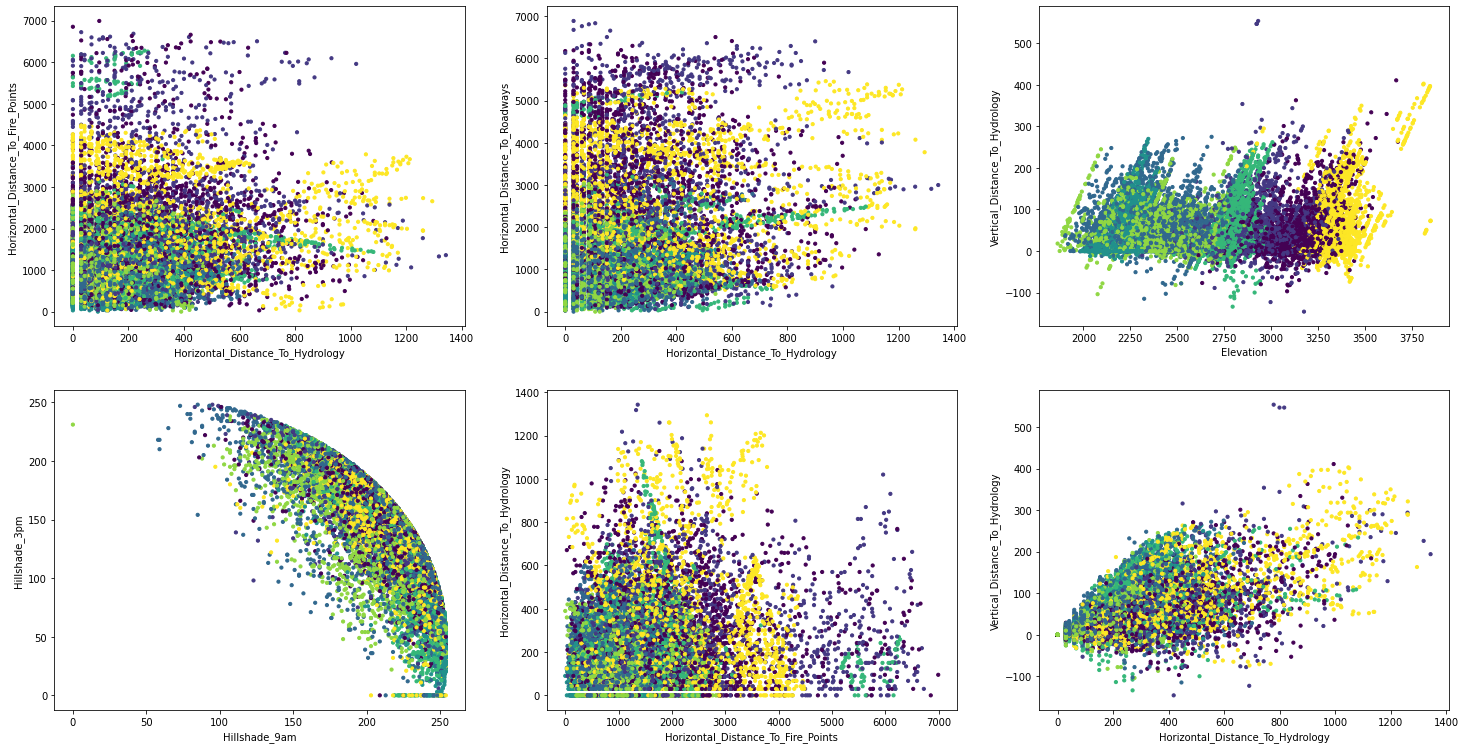

In [ ]:
import matplotlib.pyplot as plt
classes = np.array(list(Forest_cover.Cover_Type.values))

def plotRelation(first_feature, sec_feature):
    
    plt.scatter(first_feature, sec_feature, c = classes, s=10)
    plt.xlabel(first_feature.name)
    plt.ylabel(sec_feature.name)
    
f = plt.figure(figsize=(25,20))
f.add_subplot(331)
plotRelation(Forest_cover.Horizontal_Distance_To_Hydrology, Forest_cover.Horizontal_Distance_To_Fire_Points)
f.add_subplot(332)
plotRelation(Forest_cover.Horizontal_Distance_To_Hydrology, Forest_cover.Horizontal_Distance_To_Roadways)
f.add_subplot(333)
plotRelation(Forest_cover.Elevation, Forest_cover.Vertical_Distance_To_Hydrology)
f.add_subplot(334)
plotRelation(Forest_cover.Hillshade_9am, Forest_cover.Hillshade_3pm)
f.add_subplot(335)
plotRelation(Forest_cover.Horizontal_Distance_To_Fire_Points, Forest_cover.Horizontal_Distance_To_Hydrology)
f.add_subplot(336)
plotRelation(Forest_cover.Horizontal_Distance_To_Hydrology, Forest_cover.Vertical_Distance_To_Hydrology)

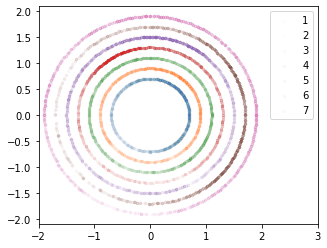

In [ ]:
# The angle will be divided into sine and cosine
sin_ = np.sin(np.pi*Forest_cover["Aspect"]/180)
cos_ = np.cos(np.pi*Forest_cover["Aspect"]/180)

# However, if this feature quantity alone, the effect seems to be light.
plt.figure(figsize=(5, 4))
for i in range(1, 8):
    cat = np.where(Forest_cover["Cover_Type"] == i)[0]
    r = (.5+0.2*i)
    plt.scatter(cos_[cat]*(r), sin_[cat]*(r), alpha=0.02*r, s=6, label=i)
plt.xlim(-2, 3)
plt.legend()
plt.savefig("aspect.png")

In [ ]:
hydro_h = Forest_cover["Vertical_Distance_To_Hydrology"]
hydro_v = Forest_cover["Horizontal_Distance_To_Hydrology"]

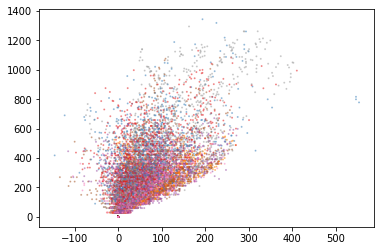

In [ ]:
plt.scatter(hydro_h, hydro_v, s=1, c=Forest_cover["Cover_Type"], cmap="Set1", alpha=0.4)


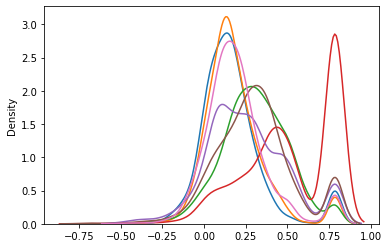

In [ ]:
hydro_arctan = np.arctan((hydro_h+0.0001) / (hydro_v+0.0001))
for i in range(1, 8):
    cat = np.where(Forest_cover["Cover_Type"] == i)[0]
    sns.kdeplot(hydro_arctan[cat])

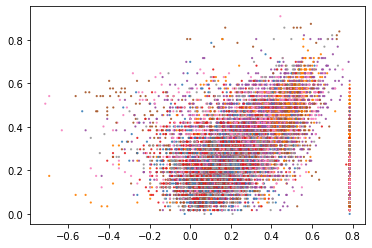

In [ ]:
plt.scatter(hydro_arctan, np.pi*Forest_cover["Slope"]/180, c=Forest_cover["Cover_Type"], cmap="Set1", s=1.5, alpha=0.8)

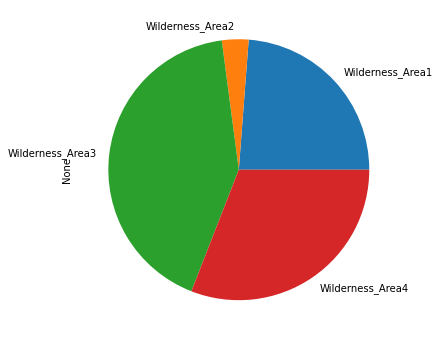

In [5]:
# Ratio of Wilderness_Area
plt.figure(figsize=(6, 6))
Forest_cover.filter(regex="Wilder").sum(axis=0).plot(kind="pie")

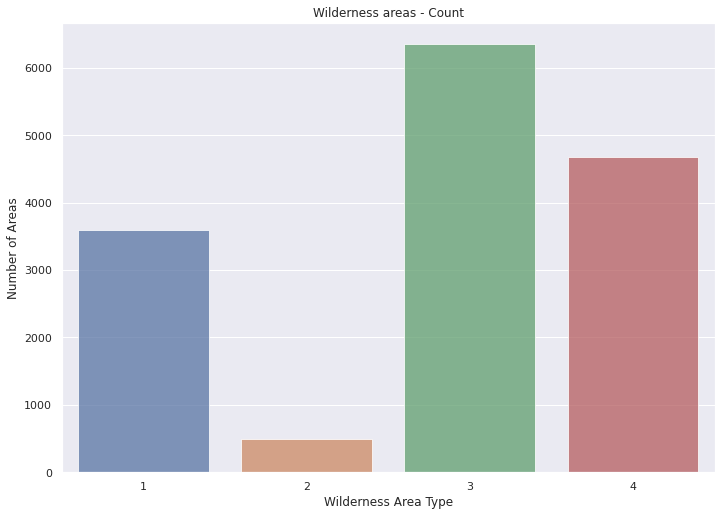

In [ ]:
# Wilderness area countplot

ax = sns.countplot(Forest_cover['Wilderness_Area'], alpha=0.75)
ax.set(xlabel='Wilderness Area Type', ylabel='Number of Areas', title='Wilderness areas - Count')
plt.show()

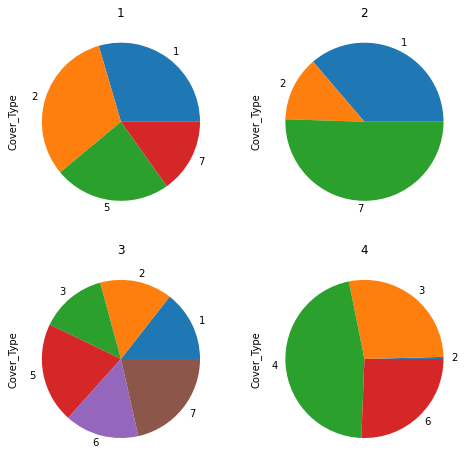

In [ ]:
#The ratio of "Cover_Type" in each "Wildereness_area"
wilder = (Forest_cover.filter(regex="Wilder") * np.array([1, 2, 3, 4])).sum(axis=1)
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.flatten()
for i, ax in enumerate(axs, start=1):
    Forest_cover.loc[wilder==i, "Cover_Type"].value_counts().sort_index().plot(kind='pie', ax=ax)
    ax.set_title(i)

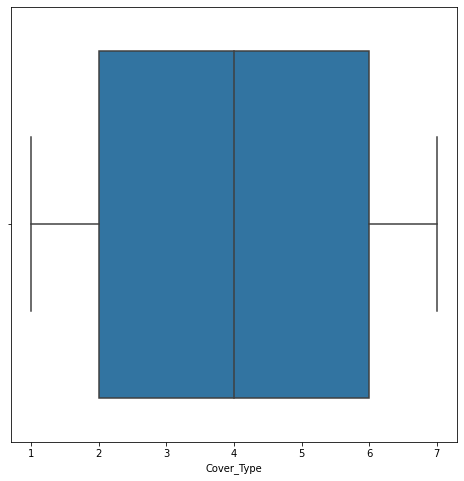

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(Forest_cover['Cover_Type'], orient='v')

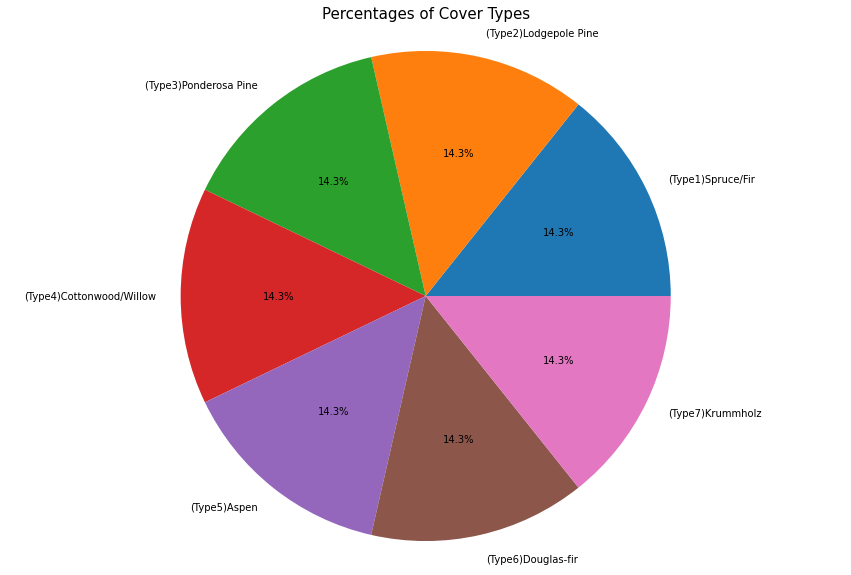

In [6]:
class_dist = Forest_cover.groupby('Cover_Type').size()
labels= '(Type1)Spruce/Fir', '(Type2)Lodgepole Pine', '(Type3)Ponderosa Pine', '(Type4)Cottonwood/Willow', '(Type5)Aspen', '(Type6)Douglas-fir', '(Type7)Krummholz'
fig1, ax1 = plt.subplots()
fig1.set_size_inches(15,10)
ax1.pie(class_dist, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Percentages of Cover Types',fontsize=15)
plt.show()

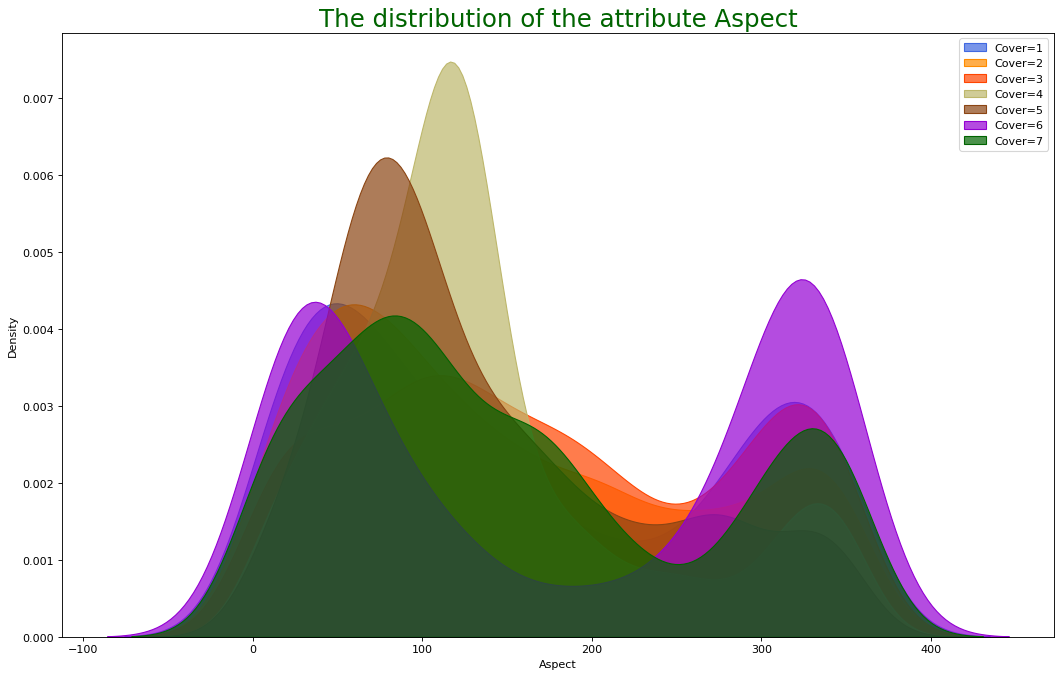

In [7]:
# Attribute Aspect vs Cover_Type
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 1, "Aspect"], shade=True, color="#4169E1", label="Cover=1", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 2, "Aspect"], shade=True, color="#FF8C00", label="Cover=2", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 3, "Aspect"], shade=True, color="#FF4500", label="Cover=3", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 4, "Aspect"], shade=True, color="#BDB76B", label="Cover=4", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 5, "Aspect"], shade=True, color="#8B4513", label="Cover=5", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 6, "Aspect"], shade=True, color="#9400D3", label="Cover=6", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 7, "Aspect"], shade=True, color="#006400", label="Cover=7", alpha=.7)

# Decoration
plt.title("The distribution of the attribute Aspect", color="#006400", fontsize=22)
plt.legend()
plt.show()

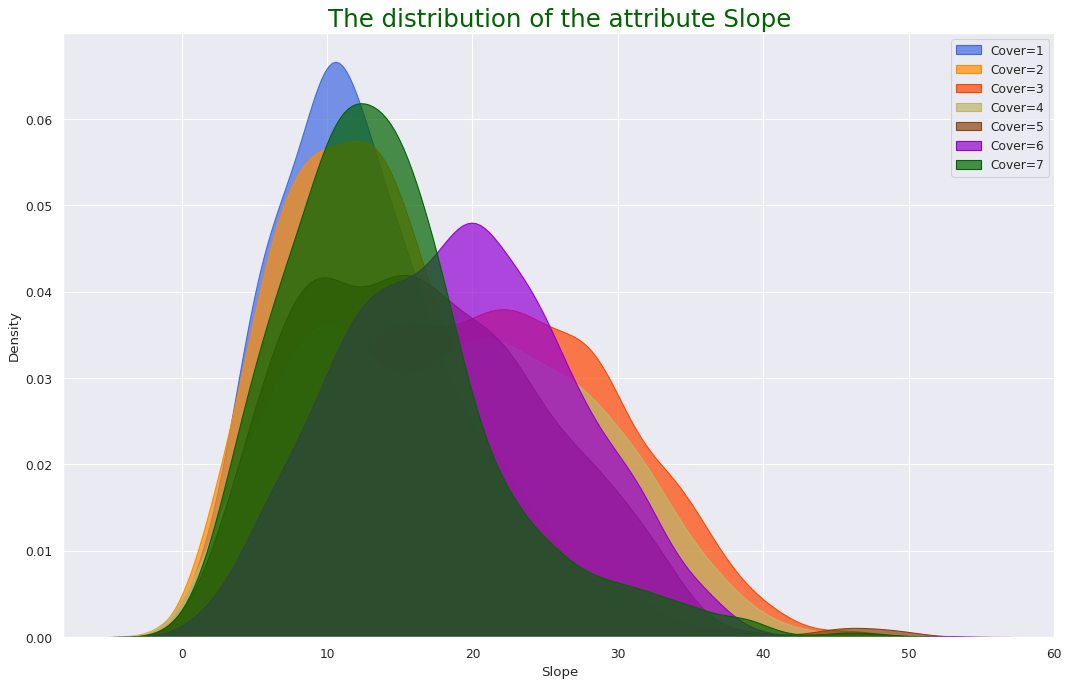

In [ ]:
# Attribute Slope vs Cover_Type
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 1, "Slope"], shade=True, color="#4169E1", label="Cover=1", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 2, "Slope"], shade=True, color="#FF8C00", label="Cover=2", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 3, "Slope"], shade=True, color="#FF4500", label="Cover=3", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 4, "Slope"], shade=True, color="#BDB76B", label="Cover=4", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 5, "Slope"], shade=True, color="#8B4513", label="Cover=5", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 6, "Slope"], shade=True, color="#9400D3", label="Cover=6", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 7, "Slope"], shade=True, color="#006400", label="Cover=7", alpha=.7)

# Decoration
plt.title("The distribution of the attribute Slope", color="#006400", fontsize=22)
plt.legend()
plt.show()

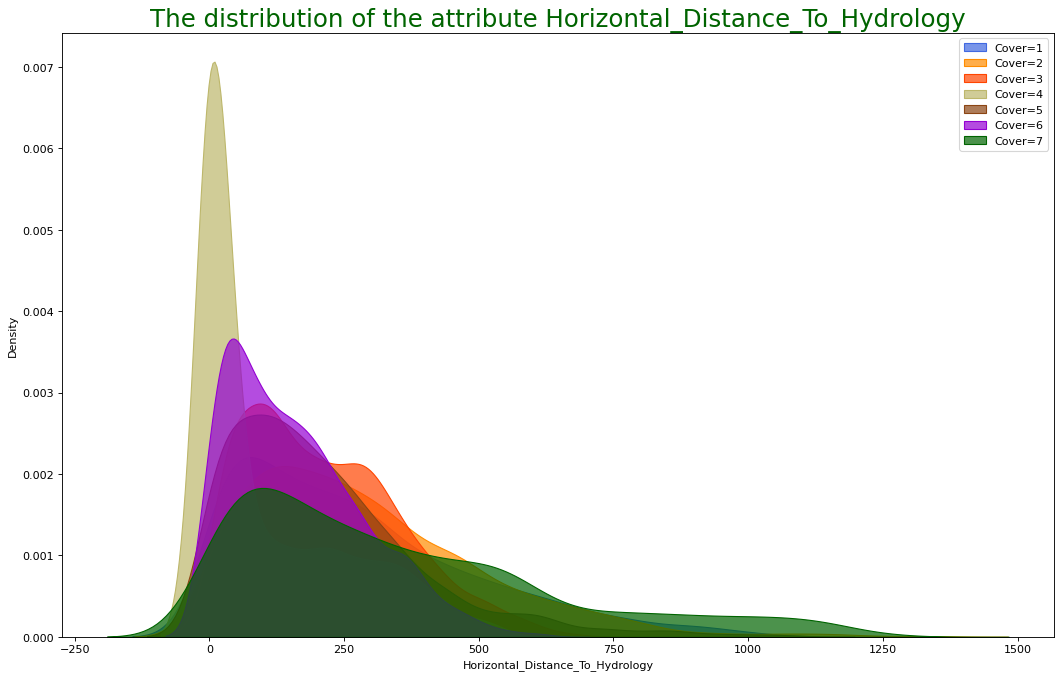

In [8]:
# Attribute Horizontal_Distance_To_Hydrology vs Cover_Type
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 1, "Horizontal_Distance_To_Hydrology"], shade=True, color="#4169E1", label="Cover=1", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 2, "Horizontal_Distance_To_Hydrology"], shade=True, color="#FF8C00", label="Cover=2", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 3, "Horizontal_Distance_To_Hydrology"], shade=True, color="#FF4500", label="Cover=3", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 4, "Horizontal_Distance_To_Hydrology"], shade=True, color="#BDB76B", label="Cover=4", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 5, "Horizontal_Distance_To_Hydrology"], shade=True, color="#8B4513", label="Cover=5", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 6, "Horizontal_Distance_To_Hydrology"], shade=True, color="#9400D3", label="Cover=6", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 7, "Horizontal_Distance_To_Hydrology"], shade=True, color="#006400", label="Cover=7", alpha=.7)

# Decoration
plt.title("The distribution of the attribute Horizontal_Distance_To_Hydrology", color="#006400", fontsize=22)
plt.legend()
plt.show()

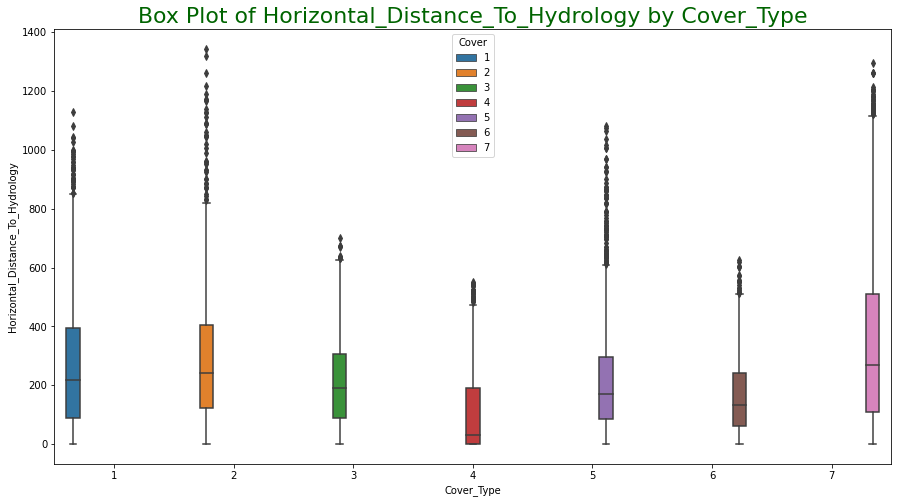

In [9]:
# Draw Plot
plt.figure(figsize=(15,8))
sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Hydrology", data=Forest_cover, hue="Cover_Type")

# Decoration
plt.title("Box Plot of Horizontal_Distance_To_Hydrology by Cover_Type", fontsize=22, color="#006400")
plt.legend(title="Cover")
plt.show()

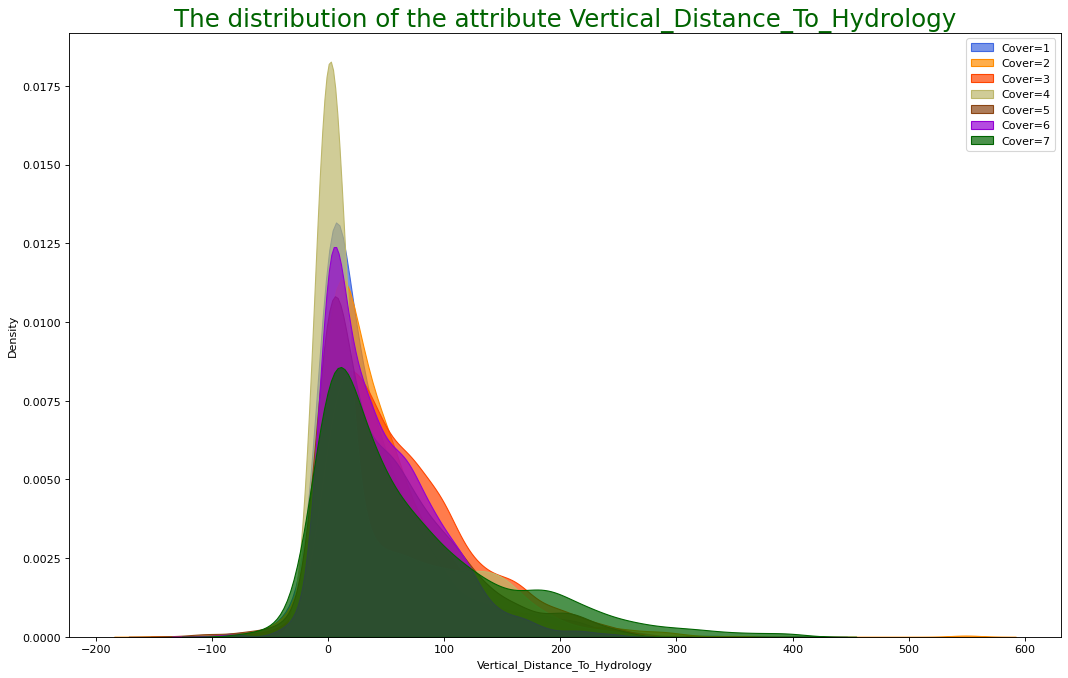

In [10]:
#Attribute Vertical_Distance_To_Hydrology vs Cover_Type
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 1, "Vertical_Distance_To_Hydrology"], shade=True, color="#4169E1", label="Cover=1", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 2, "Vertical_Distance_To_Hydrology"], shade=True, color="#FF8C00", label="Cover=2", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 3, "Vertical_Distance_To_Hydrology"], shade=True, color="#FF4500", label="Cover=3", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 4, "Vertical_Distance_To_Hydrology"], shade=True, color="#BDB76B", label="Cover=4", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 5, "Vertical_Distance_To_Hydrology"], shade=True, color="#8B4513", label="Cover=5", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 6, "Vertical_Distance_To_Hydrology"], shade=True, color="#9400D3", label="Cover=6", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 7, "Vertical_Distance_To_Hydrology"], shade=True, color="#006400", label="Cover=7", alpha=.7)

# Decoration
plt.title("The distribution of the attribute Vertical_Distance_To_Hydrology", color="#006400", fontsize=22)
plt.legend()
plt.show()


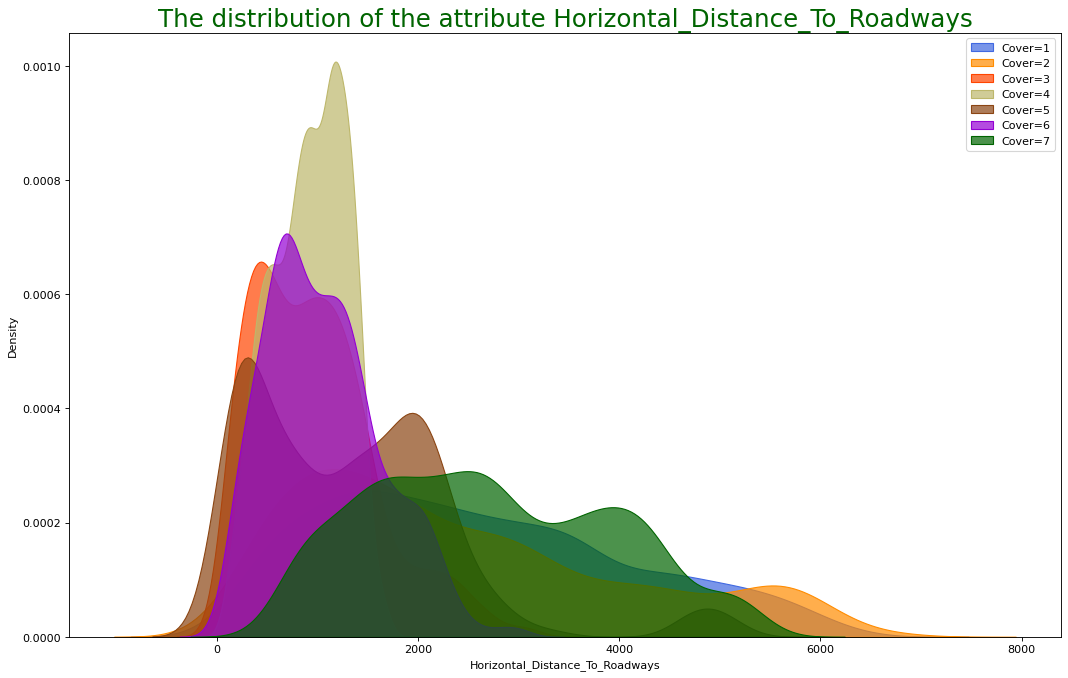

In [11]:
#Attribute Horizontal_Distance_To_Roadways vs Cover_Type
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 1, "Horizontal_Distance_To_Roadways"], shade=True, color="#4169E1", label="Cover=1", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 2, "Horizontal_Distance_To_Roadways"], shade=True, color="#FF8C00", label="Cover=2", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 3, "Horizontal_Distance_To_Roadways"], shade=True, color="#FF4500", label="Cover=3", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 4, "Horizontal_Distance_To_Roadways"], shade=True, color="#BDB76B", label="Cover=4", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 5, "Horizontal_Distance_To_Roadways"], shade=True, color="#8B4513", label="Cover=5", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 6, "Horizontal_Distance_To_Roadways"], shade=True, color="#9400D3", label="Cover=6", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 7, "Horizontal_Distance_To_Roadways"], shade=True, color="#006400", label="Cover=7", alpha=.7)

# Decoration
plt.title("The distribution of the attribute Horizontal_Distance_To_Roadways", color="#006400", fontsize=22)
plt.legend()
plt.show()

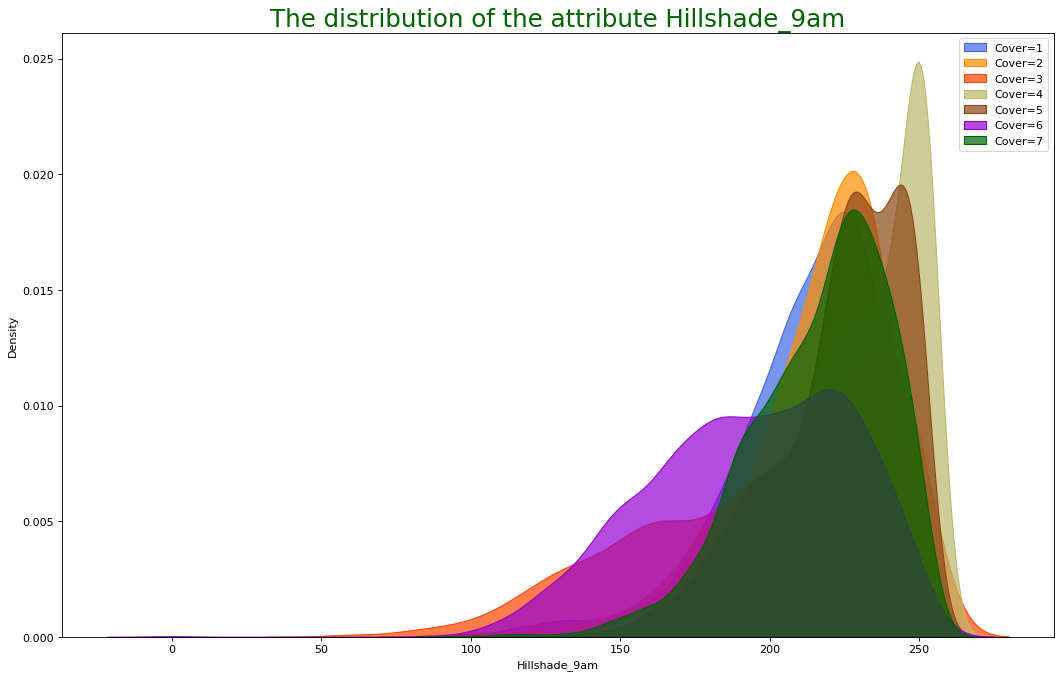

In [12]:
# Attribute Hillshade_9am vs Cover_Type
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 1, "Hillshade_9am"], shade=True, color="#4169E1", label="Cover=1", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 2, "Hillshade_9am"], shade=True, color="#FF8C00", label="Cover=2", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 3, "Hillshade_9am"], shade=True, color="#FF4500", label="Cover=3", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 4, "Hillshade_9am"], shade=True, color="#BDB76B", label="Cover=4", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 5, "Hillshade_9am"], shade=True, color="#8B4513", label="Cover=5", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 6, "Hillshade_9am"], shade=True, color="#9400D3", label="Cover=6", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 7, "Hillshade_9am"], shade=True, color="#006400", label="Cover=7", alpha=.7)

# Decoration
plt.title("The distribution of the attribute Hillshade_9am", color="#006400", fontsize=22)
plt.legend()
plt.show()

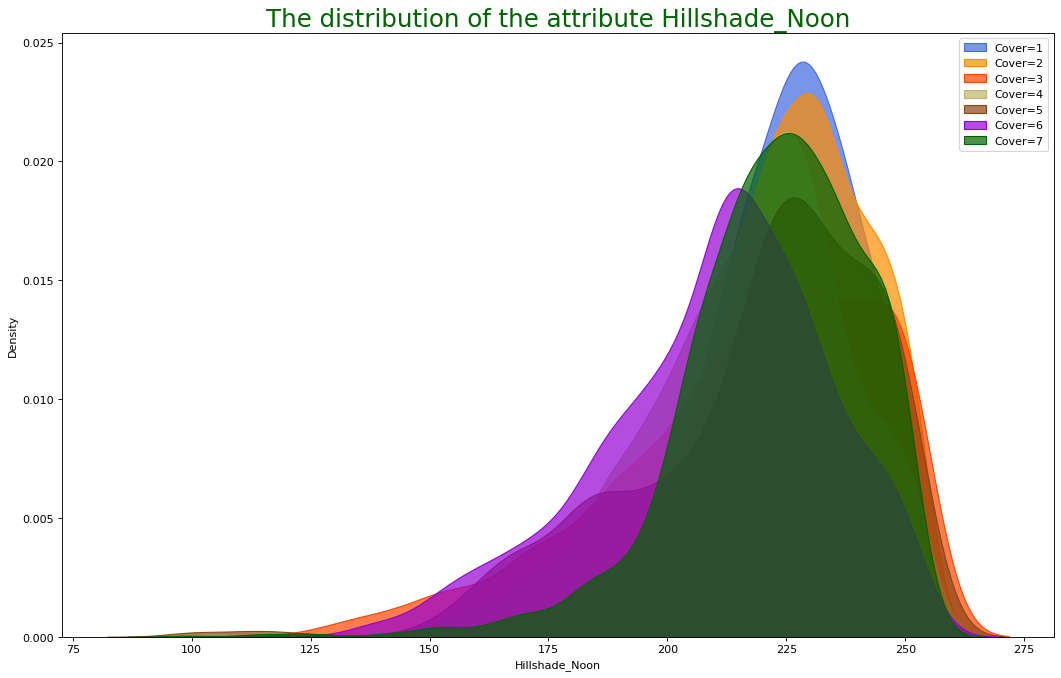

In [13]:
# Attribute Hillshade_Noon vs Cover_Type
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 1, "Hillshade_Noon"], shade=True, color="#4169E1", label="Cover=1", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 2, "Hillshade_Noon"], shade=True, color="#FF8C00", label="Cover=2", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 3, "Hillshade_Noon"], shade=True, color="#FF4500", label="Cover=3", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 4, "Hillshade_Noon"], shade=True, color="#BDB76B", label="Cover=4", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 5, "Hillshade_Noon"], shade=True, color="#8B4513", label="Cover=5", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 6, "Hillshade_Noon"], shade=True, color="#9400D3", label="Cover=6", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 7, "Hillshade_Noon"], shade=True, color="#006400", label="Cover=7", alpha=.7)

# Decoration
plt.title("The distribution of the attribute Hillshade_Noon", color="#006400", fontsize=22)
plt.legend()
plt.show()


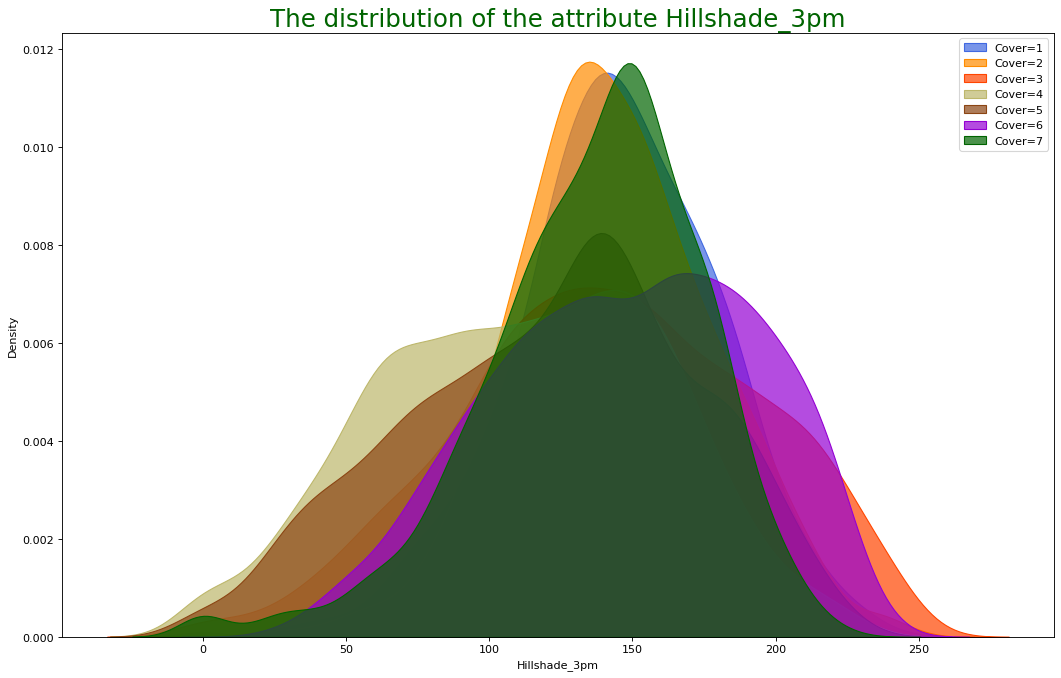

In [14]:
# Attribute Hillshade_3pm vs Cover_Type
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 1, "Hillshade_3pm"], shade=True, color="#4169E1", label="Cover=1", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 2, "Hillshade_3pm"], shade=True, color="#FF8C00", label="Cover=2", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 3, "Hillshade_3pm"], shade=True, color="#FF4500", label="Cover=3", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 4, "Hillshade_3pm"], shade=True, color="#BDB76B", label="Cover=4", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 5, "Hillshade_3pm"], shade=True, color="#8B4513", label="Cover=5", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 6, "Hillshade_3pm"], shade=True, color="#9400D3", label="Cover=6", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 7, "Hillshade_3pm"], shade=True, color="#006400", label="Cover=7", alpha=.7)

# Decoration
plt.title("The distribution of the attribute Hillshade_3pm", color="#006400", fontsize=22)
plt.legend()
plt.show()

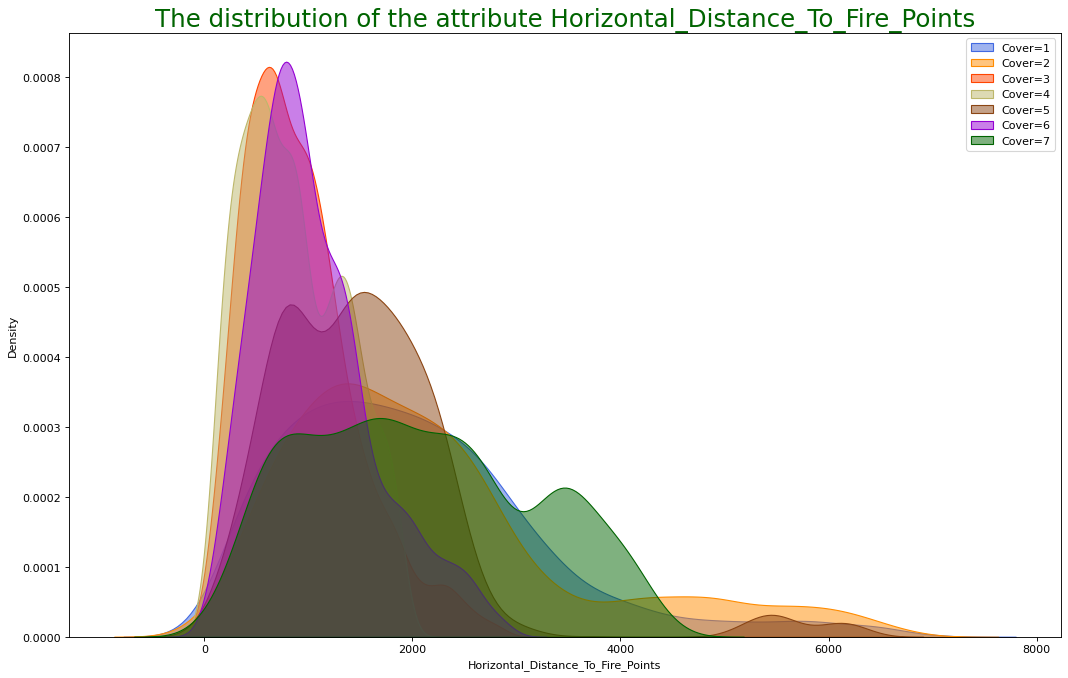

In [16]:
# Attribute Horizontal_Distance_To_Fire_Points vs Cover_Type
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 1, "Horizontal_Distance_To_Fire_Points"], shade=True, color="#4169E1", label="Cover=1", alpha=.5)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 2, "Horizontal_Distance_To_Fire_Points"], shade=True, color="#FF8C00", label="Cover=2", alpha=.5)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 3, "Horizontal_Distance_To_Fire_Points"], shade=True, color="#FF4500", label="Cover=3", alpha=.5)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 4, "Horizontal_Distance_To_Fire_Points"], shade=True, color="#BDB76B", label="Cover=4", alpha=.5)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 5, "Horizontal_Distance_To_Fire_Points"], shade=True, color="#8B4513", label="Cover=5", alpha=.5)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 6, "Horizontal_Distance_To_Fire_Points"], shade=True, color="#9400D3", label="Cover=6", alpha=.5)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 7, "Horizontal_Distance_To_Fire_Points"], shade=True, color="#006400", label="Cover=7", alpha=.5)

# Decoration
plt.title("The distribution of the attribute Horizontal_Distance_To_Fire_Points", color="#006400", fontsize=22)
plt.legend()
plt.show()

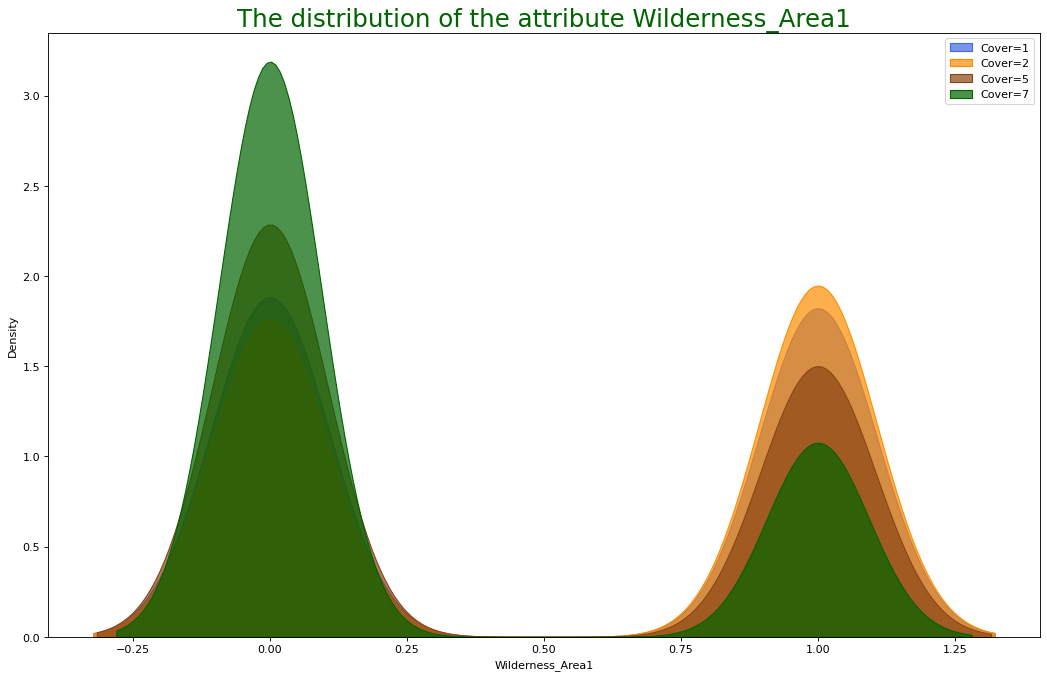

In [18]:
# Attribute Wilderness_Area1 vs Cover_Type
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 1, "Wilderness_Area1"], shade=True, color="#4169E1", label="Cover=1", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 2, "Wilderness_Area1"], shade=True, color="#FF8C00", label="Cover=2", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 3, "Wilderness_Area1"], shade=True, color="#FF4500", label="Cover=3", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 4, "Wilderness_Area1"], shade=True, color="#BDB76B", label="Cover=4", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 5, "Wilderness_Area1"], shade=True, color="#8B4513", label="Cover=5", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 6, "Wilderness_Area1"], shade=True, color="#9400D3", label="Cover=6", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 7, "Wilderness_Area1"], shade=True, color="#006400", label="Cover=7", alpha=.7)

# Decoration
plt.title("The distribution of the attribute Wilderness_Area1", color="#006400", fontsize=22)
plt.legend()
plt.show()

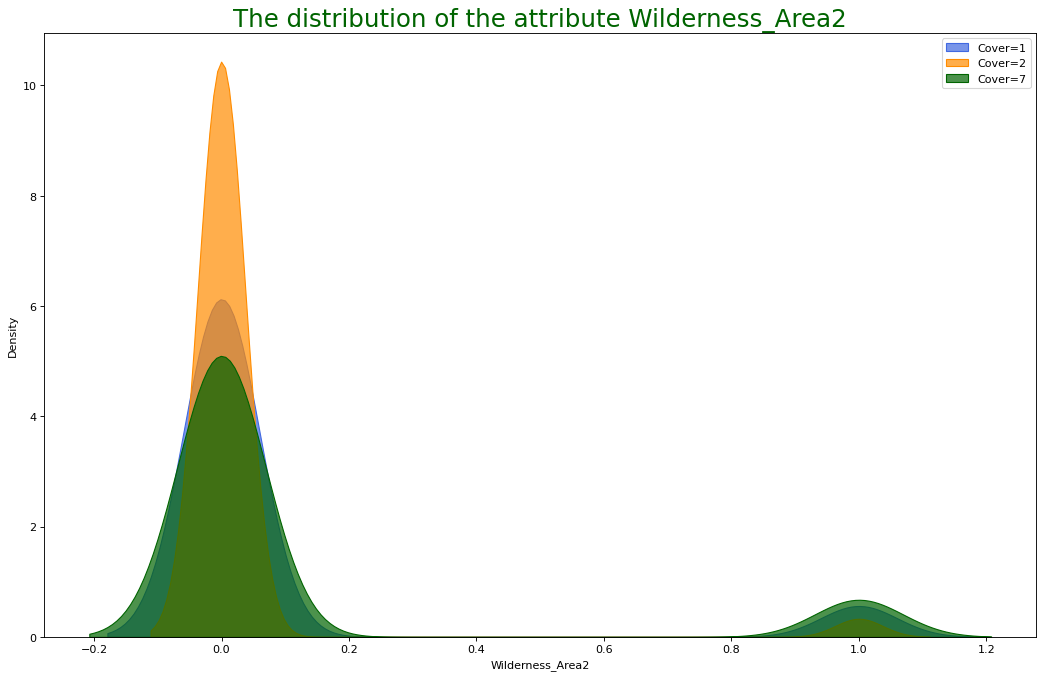

In [19]:
# Attribute Wilderness_Area2 vs Cover_Type
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 1, "Wilderness_Area2"], shade=True, color="#4169E1", label="Cover=1", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 2, "Wilderness_Area2"], shade=True, color="#FF8C00", label="Cover=2", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 3, "Wilderness_Area2"], shade=True, color="#FF4500", label="Cover=3", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 4, "Wilderness_Area2"], shade=True, color="#BDB76B", label="Cover=4", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 5, "Wilderness_Area2"], shade=True, color="#8B4513", label="Cover=5", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 6, "Wilderness_Area2"], shade=True, color="#9400D3", label="Cover=6", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 7, "Wilderness_Area2"], shade=True, color="#006400", label="Cover=7", alpha=.7)

# Decoration
plt.title("The distribution of the attribute Wilderness_Area2", color="#006400", fontsize=22)
plt.legend()
plt.show()

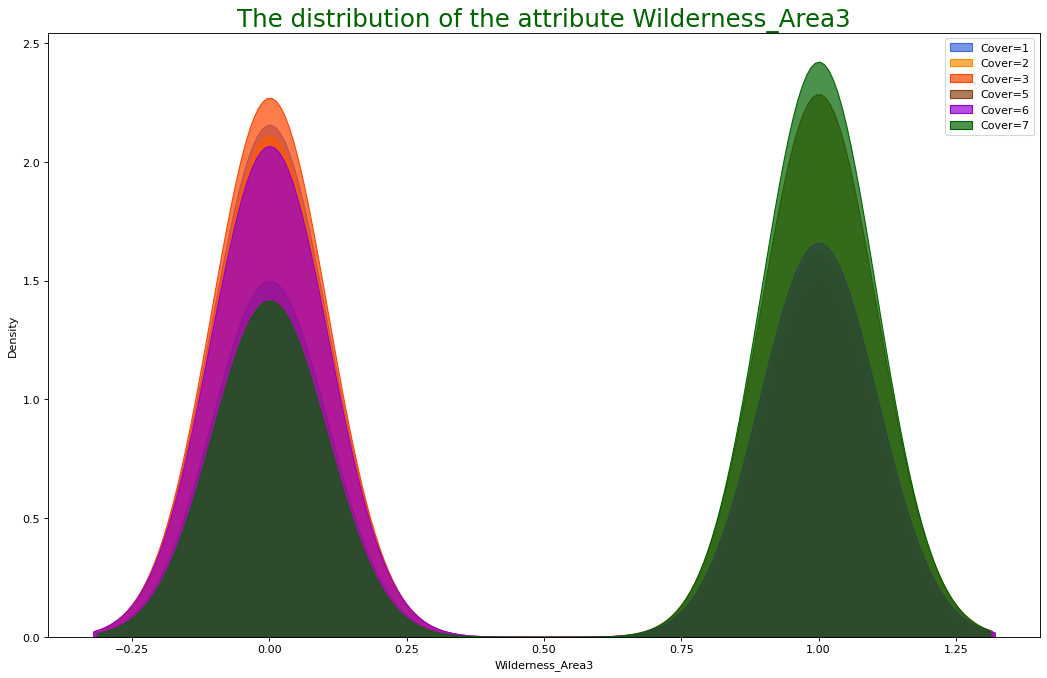

In [20]:
# Attribute Wilderness_Area3 vs Cover_Type
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 1, "Wilderness_Area3"], shade=True, color="#4169E1", label="Cover=1", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 2, "Wilderness_Area3"], shade=True, color="#FF8C00", label="Cover=2", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 3, "Wilderness_Area3"], shade=True, color="#FF4500", label="Cover=3", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 4, "Wilderness_Area3"], shade=True, color="#BDB76B", label="Cover=4", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 5, "Wilderness_Area3"], shade=True, color="#8B4513", label="Cover=5", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 6, "Wilderness_Area3"], shade=True, color="#9400D3", label="Cover=6", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 7, "Wilderness_Area3"], shade=True, color="#006400", label="Cover=7", alpha=.7)

# Decoration
plt.title("The distribution of the attribute Wilderness_Area3", color="#006400", fontsize=22)
plt.legend()
plt.show()

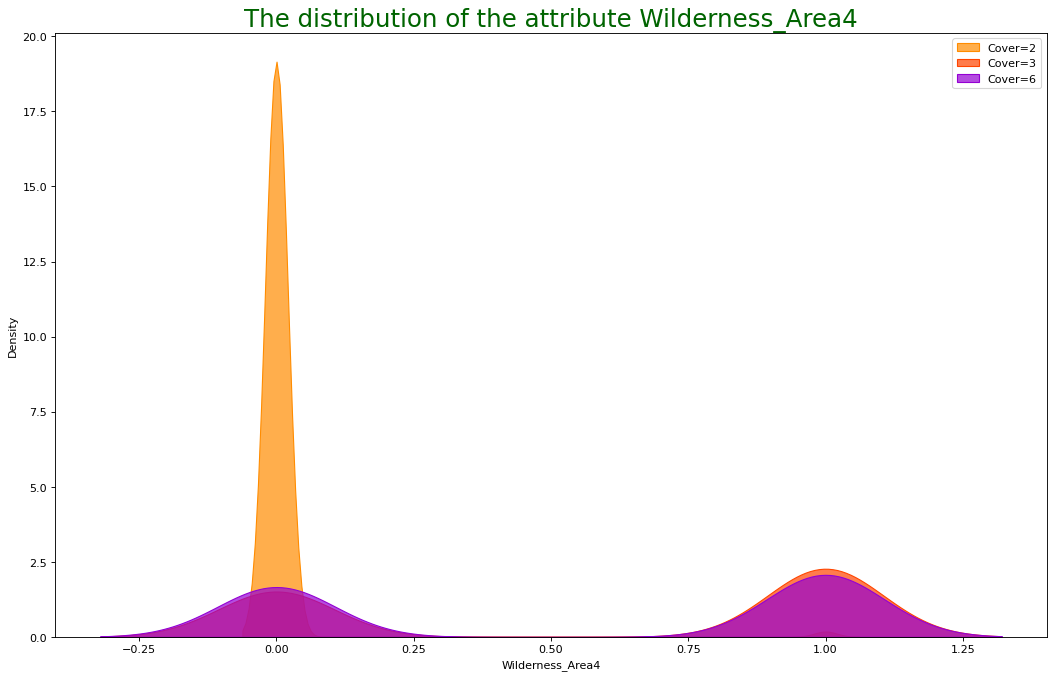

In [21]:
# Attribute Wilderness_Area4 vs Cover_Type
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 1, "Wilderness_Area4"], shade=True, color="#4169E1", label="Cover=1", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 2, "Wilderness_Area4"], shade=True, color="#FF8C00", label="Cover=2", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 3, "Wilderness_Area4"], shade=True, color="#FF4500", label="Cover=3", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 4, "Wilderness_Area4"], shade=True, color="#BDB76B", label="Cover=4", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 5, "Wilderness_Area4"], shade=True, color="#8B4513", label="Cover=5", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 6, "Wilderness_Area4"], shade=True, color="#9400D3", label="Cover=6", alpha=.7)
sns.kdeplot(Forest_cover.loc[Forest_cover["Cover_Type"] == 7, "Wilderness_Area4"], shade=True, color="#006400", label="Cover=7", alpha=.7)

# Decoration
plt.title("The distribution of the attribute Wilderness_Area4", color="#006400", fontsize=22)
plt.legend()
plt.show()

#Let's apply Chi square test to find the relation of prediction with target variable

In [22]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(Forest_cover)

#Feature Selection
testColumns = ['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="Cover_Type" )  

Id is NOT an important predictor. (Discard Id from model)
Elevation is IMPORTANT for Prediction
Aspect is IMPORTANT for Prediction
Slope is IMPORTANT for Prediction
Horizontal_Distance_To_Hydrology is IMPORTANT for Prediction
Vertical_Distance_To_Hydrology is IMPORTANT for Prediction
Horizontal_Distance_To_Roadways is IMPORTANT for Prediction
Hillshade_9am is IMPORTANT for Prediction
Hillshade_Noon is IMPORTANT for Prediction
Hillshade_3pm is IMPORTANT for Prediction
Horizontal_Distance_To_Fire_Points is IMPORTANT for Prediction
Wilderness_Area1 is IMPORTANT for Prediction
Wilderness_Area2 is IMPORTANT for Prediction
Wilderness_Area3 is IMPORTANT for Prediction
Wilderness_Area4 is IMPORTANT for Prediction
Soil_Type1 is IMPORTANT for Prediction
Soil_Type2 is IMPORTANT for Prediction
Soil_Type3 is IMPORTANT for Prediction
Soil_Type4 is IMPORTANT for Prediction
Soil_Type5 is IMPORTANT for Prediction
Soil_Type6 is IMPORTANT for Prediction
Soil_Type7 is NOT an important predictor. (Discard 

#id , Soil Type 7,8,15,25 has to be discarded from the final model


In [23]:
soil_list = []
soil_not=[7,8,15,25]
for i in range(1, 41):
    if i not in soil_not:
       soil_list.append('Soil_Type' + str(i))

wilderness_area_list = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']

print(soil_list, "\n")
print(wilderness_area_list)

['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'] 

['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']


#Removed some soil features which were not useful in prediction of forest cover

#Now we will compress the features so that we can do visualization and can drawout some inferences

In [24]:
def wilderness_compress(df):
    
    df[wilderness_area_list] = df[wilderness_area_list].multiply([1, 2, 3, 4], axis=1)
    df['Wilderness_Area'] = df[wilderness_area_list].sum(axis=1)
    return df

In [25]:
def soil_compress(df):
    
    df[soil_list] = df[soil_list].multiply([i for i in range(1, 37)], axis=1)
    df['Soil_Type'] = df[soil_list].sum(axis=1)
    return df

In [26]:
Forest_cover = wilderness_compress(Forest_cover)
Forest_cover = soil_compress(Forest_cover)

Forest_cover[['Wilderness_Area', 'Soil_Type']].sample(5)

Wilderness_Area  Soil_Type
12995                4          2
12961                3         11
11535                1         10
14562                3         36
6671                 3          4

In [27]:
Forest_cover.Wilderness_Area.value_counts()

3    6349
4    4675
1    3597
2     499
Name: Wilderness_Area, dtype: int64

In [28]:
cols = Forest_cover.columns.tolist()
columns = cols[1:11] + cols[56:]

print("Useful columns: ", columns)

values = Forest_cover[columns]
labels = Forest_cover['Cover_Type']

print("Values: ", values.shape)
print("Labels: ", labels.shape)

Useful columns:  ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type']
Values:  (15120, 12)
Labels:  (15120,)


In [29]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

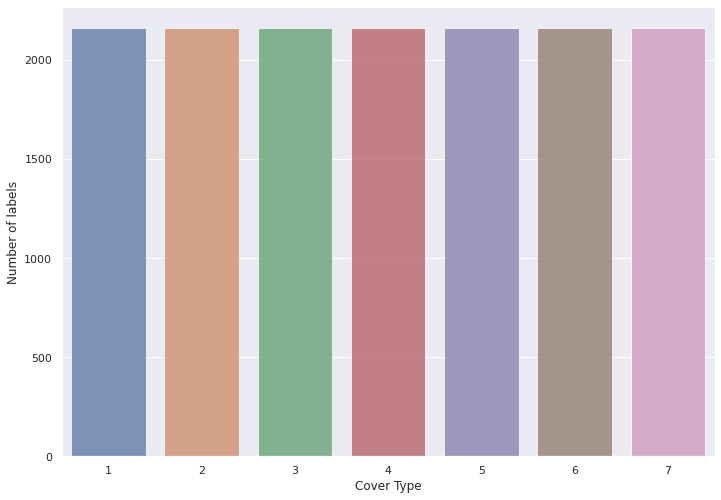

In [30]:
ax = sns.countplot(labels, alpha=0.75)
ax.set(xlabel='Cover Type', ylabel='Number of labels')
plt.show()

#No class imbalance issues

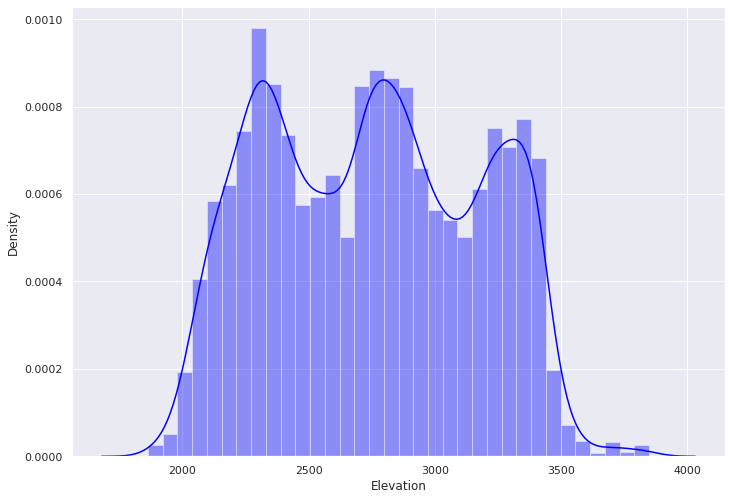

In [31]:
ax = sns.distplot(Forest_cover['Elevation'], color='blue')
plt.show()

#elevation is from 2260 to 3250 maximum values

In [32]:
Forest_cover.head(4)

Id  Elevation  Aspect  ...  Cover_Type  Wilderness_Area  Soil_Type
0   1       2596      51  ...           5                1         25
1   2       2590      56  ...           5                1         25
2   3       2804     139  ...           2                1         10
3   4       2785     155  ...           2                1         26

[4 rows x 58 columns]

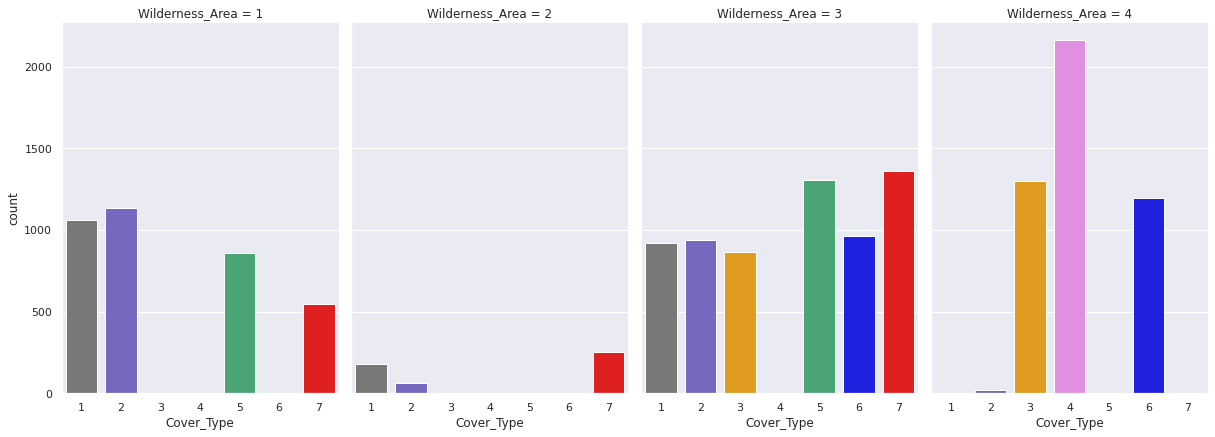

In [33]:
ax=sns.factorplot(x="Cover_Type",col="Wilderness_Area", data=Forest_cover , kind="count",size=6, aspect=.7,palette=['#787878','#6a5acd','#ffa500','#ee82ee','#3cb371','#0000ff','#ff0000'])

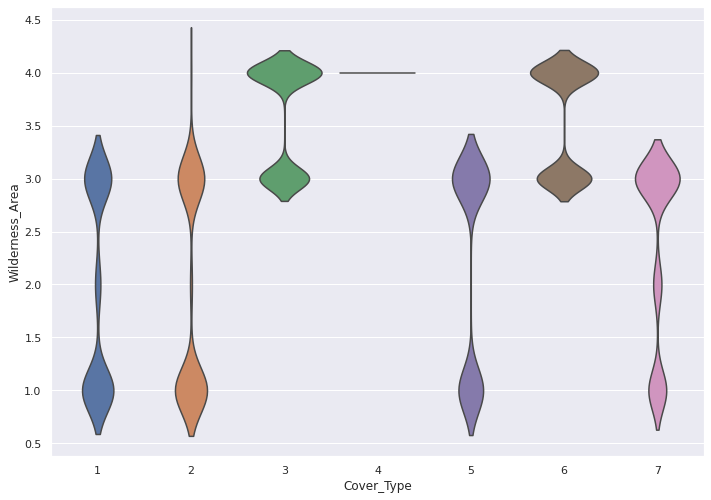

In [34]:
ax = sns.violinplot(x="Cover_Type", y="Wilderness_Area", data=Forest_cover, inner=None)


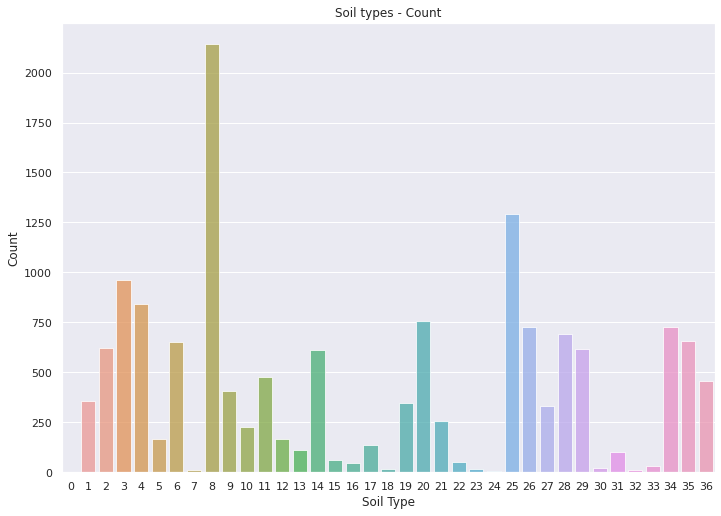

In [35]:
ax = sns.countplot(Forest_cover['Soil_Type'], alpha=0.75)
ax.set(xlabel='Soil Type', ylabel='Count', title='Soil types - Count')
plt.show()

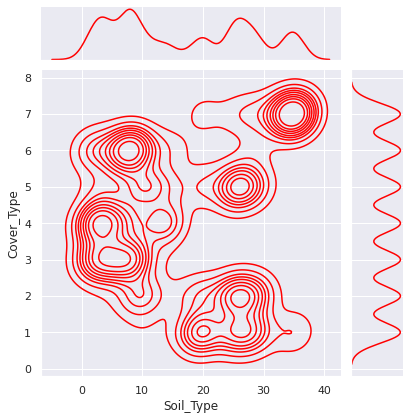

In [36]:
ax = sns.jointplot(x='Soil_Type', y='Cover_Type', data=Forest_cover, kind='kde', color='#ff0000')
plt.show()

In [ ]:
'''clean = Forest_cover[['Id', 'Cover_Type'] + columns]
clean.head()'''

Id  Cover_Type  ...  Wilderness_Area  Soil_Type
0   1           5  ...                1         25
1   2           5  ...                1         25
2   3           2  ...                1         10
3   4           2  ...                1         26
4   5           5  ...                1         25

[5 rows x 14 columns]

In [ ]:
'''z=clean.iloc[:,0]
clean=clean.drop(['Id','Cover_Type'],axis=1)
clean.info()'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area                     15120 non-null  int64
 11  Soil_Type                           15120 non-null  int64
dtypes: i

In [ ]:
Forest_cover.sample(2)

Id  Elevation  Aspect  ...  Cover_Type  Wilderness_Area  Soil_Type
1684  1685       2959      80  ...           2                1         25
9549  9550       3456     323  ...           7                3         34

[2 rows x 58 columns]

In [37]:
X = Forest_cover[["Elevation","Aspect","Slope","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Wilderness_Area","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points","Soil_Type"]]
X.head()


Elevation  Aspect  ...  Horizontal_Distance_To_Fire_Points  Soil_Type
0       2596      51  ...                                6279         25
1       2590      56  ...                                6225         25
2       2804     139  ...                                6121         10
3       2785     155  ...                                6211         26
4       2595      45  ...                                6172         25

[5 rows x 12 columns]

In [38]:
y = Forest_cover['Cover_Type']
y.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

## 4.Splitting X and y into training and test datasets.

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [92]:
print(X_train.shape)
print(y_train.shape)

(12096, 12)
(12096,)


In [93]:
print(X_test.shape)
print(y_test.shape)

(3024, 12)
(3024,)


In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(Forest_cover)
Forest_sc = sc.transform(Forest_cover)

In [95]:
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 12096 samples in the training set and 3024 samples in the test set



## 5.Model evaluation

In [44]:
# Model Import 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [45]:
# Create a list 
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]

In [89]:
#Train result
accuracy_dict = {}
for eachModel in models:
  model = eachModel
  model.fit(X_train, y_train)
  pred = model.predict(X_train)
  clf_accuracy.append(accuracy_score(pred,y_train))
  print(accuracy_score(pred,y_train))
  #print (accuracy)
  #accuracy_dict[type(model).__name__] = accuracy

print (accuracy_dict)

0.4929728835978836
1.0
1.0
{}


In [96]:
#Test result
print ("This is base model experiementation to decide benchmark models saved in Dictionary ")
accuracy_dict = {}
for eachModel in models:
  model = eachModel
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  clf_accuracy.append(accuracy_score(pred,y_test))
  print(accuracy_score(pred,y_test))
  #print (accuracy)
  #accuracy_dict[type(model).__name__] = accuracy

print (accuracy_dict)

This is base model experiementation to decide benchmark models saved in Dictionary 
0.49503968253968256
0.7906746031746031
0.8634259259259259
{}


In [98]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
clf_accuracy = accuracy_score(pred,y_test)

In [99]:
model.fit(X_train, y_train)
pred1 = model.predict(X_train)
clf_accuracy = accuracy_score(pred1,y_train)

<a id=section501></a>
# 5.1 KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p=1)
# p2 - eucledian 

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [53]:
y_preds1 = knn.predict(X_train)

In [54]:
y_preds = knn.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_train,y_preds1)
#clf_accuracy.append(accuracy_score(y_train,y_preds1))
print('Accuracy score for the KNN train model:', knn_accuracy)

Accuracy score for the KNN train model: 0.9206349206349206


In [56]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test,y_preds)
print('Accuracy score for the KNN test model:', knn_accuracy)

Accuracy score for the KNN test model: 0.8270502645502645


<a id=section502></a>
# 5.2 Random Forest Classifier

In [57]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
y_pre=rf.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pre)
cv=cross_val_score(rf,Forest_cover.drop('Cover_Type',axis=1),Forest_cover['Cover_Type'],cv=5)
print("Mean cross validation score = ",cv.mean())
print('accuracy is ',acc)

Mean cross validation score =  0.6501984126984127
accuracy is  0.8617724867724867


In [58]:
rf=RandomForestClassifier(bootstrap=False,
 max_depth= 30,
 max_features= 'sqrt',
 min_samples_split= 3,
 n_estimators= 550,
 criterion='gini')

rf.fit(X_train,y_train)
y_pre=rf.predict(X_test)
cv=cross_val_score(rf,X_test,y_test,cv=5)
print('accuracy score is ',metrics.accuracy_score(y_test,y_pre))
print('cv score is',cv.mean())

accuracy score is  0.8746693121693122
cv score is 0.7867051611843905


In [59]:
rf.score(X_train,y_train)

1.0

In [60]:
rf.score(X_test,y_test)

0.8746693121693122

<a id=section503></a>
# 5.3 Extra tree classifier

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier(n_estimators=950,random_state=0,max_features='sqrt',min_samples_split=3)
ex.fit(X_train,y_train)
y_pre=ex.predict(X_test)
cv=cross_val_score(ex,X_test,y_test,cv=5)
print('accuracy score is ',metrics.accuracy_score(y_test,y_pre))
print('cv score is',cv.mean())

accuracy score is  0.8746693121693122
cv score is 0.7919993432214987


In [62]:
ex.score(X_train,y_train)

1.0

In [63]:
ex.score(X_test,y_test)

0.8746693121693122

In [64]:
clf_accuracy=[]

In [65]:
# Support Vector Machines
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(X_train,y_train)
pred=(model.predict(X_test))
clf_accuracy.append(accuracy_score(y_test,pred))
print(accuracy_score(y_test,pred))

0.6418650793650794


In [66]:
'''from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(data) for data in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, data in enumerate(list((df == 0).all())) if data]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df'''

In [74]:
from sklearn.preprocessing import OneHotEncoder

A = add_interactions(Forest_cover)

In [68]:
from sklearn.model_selection  import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score
from scipy import stats

In [69]:
Forest_cover.head(2)

Id  Elevation  Aspect  ...  Cover_Type  Wilderness_Area  Soil_Type
0   1       2596      51  ...           5                1         25
1   2       2590      56  ...           5                1         25

[2 rows x 58 columns]

<a id=section504></a>
# 5.4 PCA

In [105]:
Forest_cover_pca = Forest_cover.copy()
Forest_cover_pca.head(2)

Id  Elevation  Aspect  ...  Cover_Type  Wilderness_Area  Soil_Type
0   1       2596      51  ...           5                1         25
1   2       2590      56  ...           5                1         25

[2 rows x 58 columns]

In [71]:
data = Forest_cover_pca[["Elevation","Aspect","Slope","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Wilderness_Area","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points","Soil_Type"]]
data.head(2)


Elevation  Aspect  ...  Horizontal_Distance_To_Fire_Points  Soil_Type
0       2596      51  ...                                6279         25
1       2590      56  ...                                6225         25

[2 rows x 12 columns]

In [72]:
label = Forest_cover_pca['Cover_Type']
label.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [75]:
data_train,data_test,label_train,label_test=train_test_split(A,label,test_size=.30)

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
datatrain = sc.fit_transform(data_train)
datatest = sc.transform(data_test)

In [77]:
pca=PCA(n_components=.95)
data_train=pca.fit_transform(datatrain)
data_test=pca.transform(datatest)
pca.explained_variance_

array([48.02076043, 36.98555953, 23.44333826, 19.71526224, 18.42384072,
       17.88974706, 17.02445841, 16.1182611 , 15.71845342, 15.42415908,
       14.9934252 , 14.91664087, 14.87028374, 14.75006642, 14.64228842,
       14.61524134, 14.60031721, 14.54594779, 14.46026492, 14.42493278,
       14.33311581, 14.24738115, 14.19590747, 14.11671154, 14.0625669 ,
       14.00083416, 13.93081973, 13.8444716 , 13.77884156, 13.70052413,
       13.66962758, 13.46868311, 13.33606951, 12.74745511, 12.52533287,
       12.2490338 , 12.03713824, 10.89760202,  9.03870679,  6.46513303,
        6.05654699,  5.38517148,  5.19020476,  4.27572946,  3.87740576,
        3.39580399,  2.78612972,  2.65499806,  2.51364018,  2.48131214,
        2.27024368,  2.20266235,  2.15201263,  1.9710453 ,  1.73221467,
        1.67282727,  1.60296571,  1.53757223,  1.4264421 ,  1.4014882 ,
        1.37865195,  1.34702742,  1.33833441,  1.33320918,  1.30801507,
        1.27749123,  1.27019986,  1.24975864,  1.22493586,  1.21

#Color represent target variable(Cover_type)



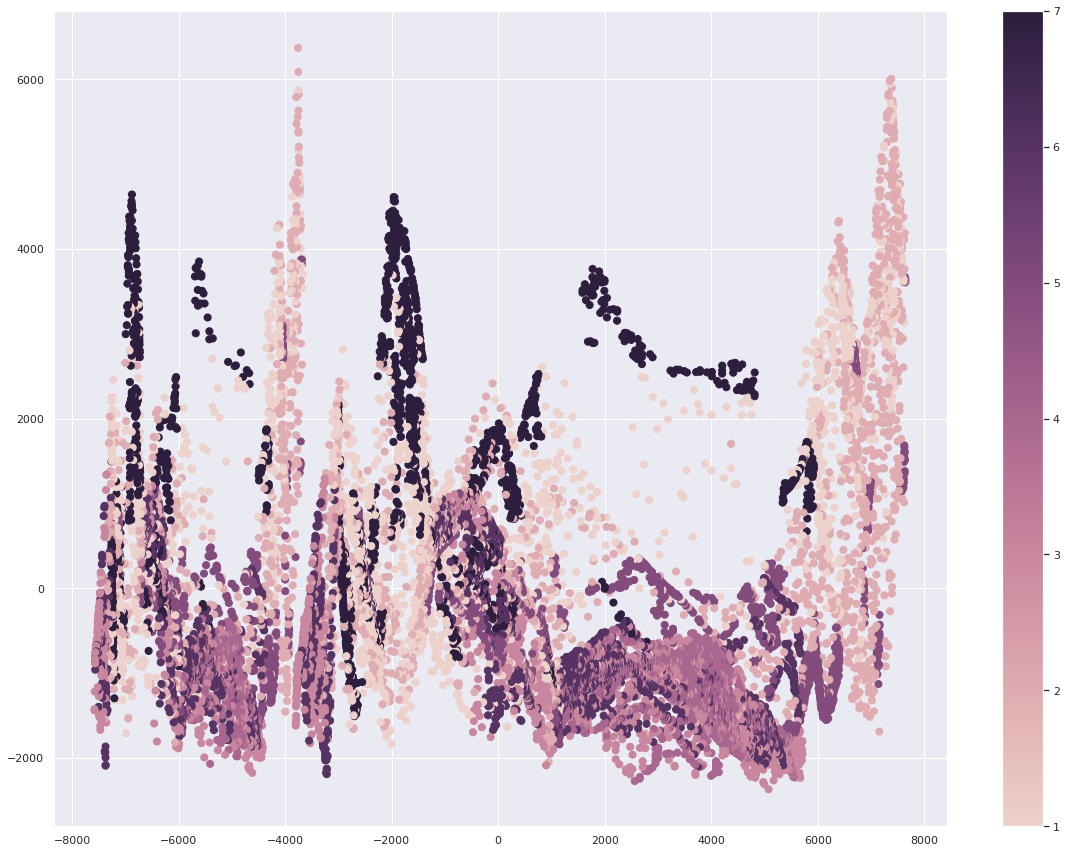

In [78]:

pca = PCA(n_components=3)
pca_results = pca.fit_transform(Forest_cover_pca.drop(["Cover_Type"], axis=1))
cmap = sns.cubehelix_palette(as_cmap=True)
tp, ax = plt.subplots(figsize=(20,15))
temp = ax.scatter(pca_results[:,0], pca_results[:,1], c=Forest_cover_pca.Cover_Type, s=50, cmap=cmap)
tp.colorbar(temp)
plt.show()

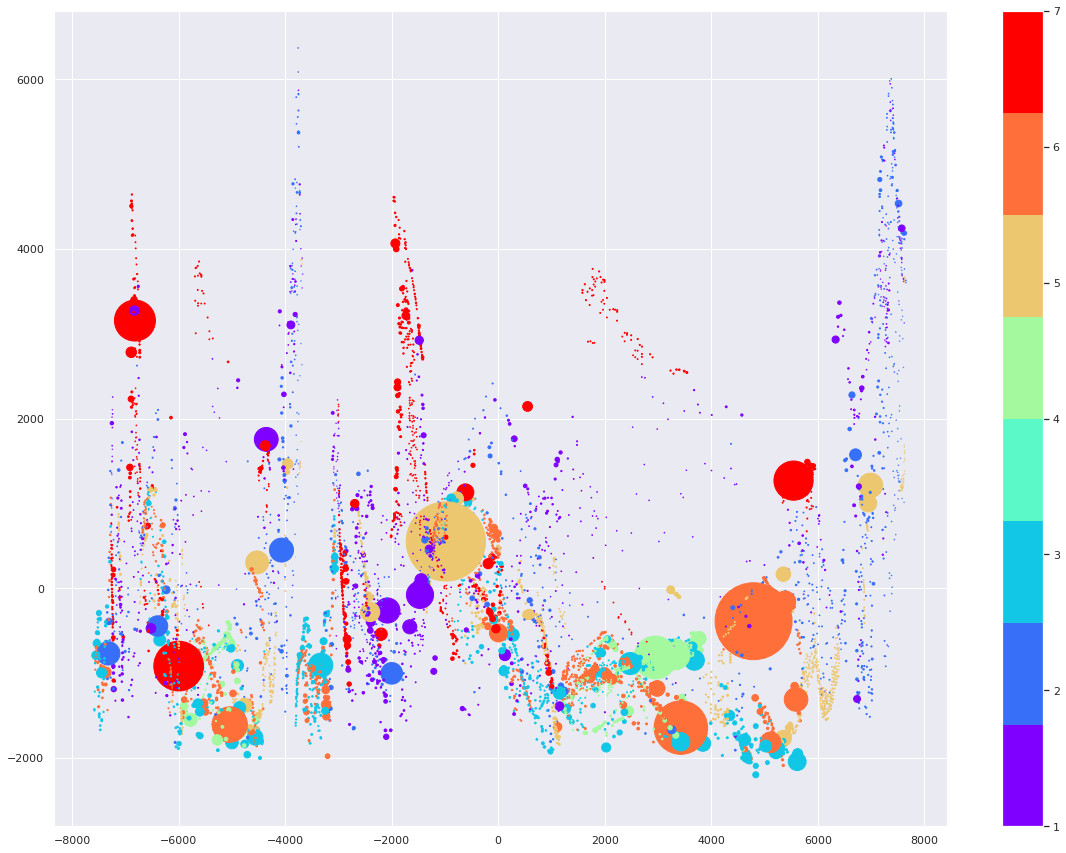

In [79]:
pca=PCA(n_components=3)
pca_results=pca.fit_transform(Forest_cover_pca.drop('Cover_Type',axis=1))
tp, ax = plt.subplots(figsize=(20,15))
temp = ax.scatter(pca_results[:,0], pca_results[:,1], c=Forest_cover_pca.Cover_Type,s=700/pca_results[:,2] ,cmap=plt.cm.get_cmap('rainbow', 8))
tp.colorbar(temp)
plt.show()

In [80]:
plt.cm.get_cmap('rainbow', 8)

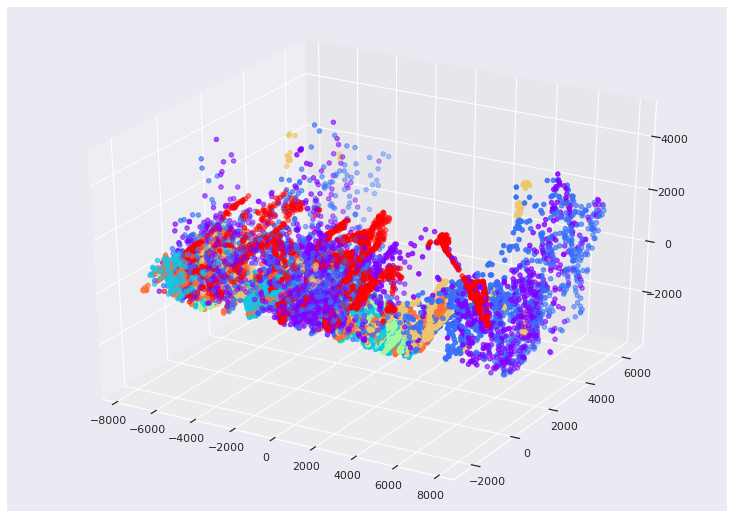

In [81]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,7))

#pca_results=pca.fit_transform(train.iloc[:,:9])
ax=Axes3D(fig)
ax.scatter(pca_results[:,0],pca_results[:,1],pca_results[:,2],cmap=plt.cm.get_cmap('rainbow', 8),c=Forest_cover_pca.Cover_Type)

In [82]:
classifier_list=['log_regression','KNN','SVM','Randomforest','DecisionTree','Extraclassifier']

# Below are the Accuray score based on our above prediction
Logistic Reg - 0.49503968253968256

DecisionTree - 0.7906746031746031

RandomForest - 0.8634259259259259

KNN - 0.8270502645502645

Extra classifier - 0.8746693121693122

SVM - 0.6418650793650794


<a id=section601></a>
## 6. CONCLUSION 



1. We can say that forest cover type 1,2,5 and 7 have Wilderness Area 1
2. Very less forest are in Wilderness Area 2
3. Wilderness Area 3 is more densely and have all types of Forest cover type except 4
4. Wilderness Area 3 Area 4 is more likely dense for 3,4 and 6 forest cover type
5. We can see that most of the forest cover type that is from 3 to 6 are more like to have soil type from 0 to 150 times
6. Forest cover type 7 is with soil types of 1400 times , and Forest cover type 1 and 2 is soil types 250 to 800 times



 From the analysis, we can bring up like forest cover type 1 is on 1 and 3 Wilderness Area , forest cover type 2 is also same

1,2,5,7 forest cover type are closely related to one another and forest cover type 3 ,6 are also close to one another forest cover type is on 4 areas

We can say that to predict forest cover type 4 has Wilderness Areas 4 , for 1,2,5,7 forest cover type we need 1,3 Wilderness areas and for 3,6 forest cover type we need 3, 4 Wilderness Areas

